<a href="https://colab.research.google.com/github/GopMajak/Predicting-Heart-Disease-using-Machine-Learning/blob/main/Predicting_Heart_Disease_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting Heart Disease using Machine Learning**

The goal of this project is to develop a machine learning model that can predict whether an individual has heart disease, based on various medical and demographic features. We will be using popular machine learning libraries in Python, such as Scikit-learn and Pandas, to build and evaluate the model.

Dataset: https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci/data

**Tasks**

*   Developed a predictive machine learning model to diagnose heart disease, utilizing Python libraries such as Scikit-learn and Pandas, achieving high accuracy in classification based on demographic and medical data.
*   Performed comprehensive data preprocessing and feature selection, applying techniques like correlation analysis and Recursive Feature Elimination (RFE) to enhance model performance and reduce overfitting.
*   Evaluated multiple machine learning algorithms (Logistic Regression, Decision Trees, Random Forests) and optimized models using cross-validation, precision, recall, and ROC-AUC metrics to ensure reliable predictions for heart disease detection.





**Results for Predicting Heart Disease using Machine Learning**

The results from the analysis show the following performance for two different models:

Logistic Regression: The logistic regression model achieved an accuracy of 80%. This indicates that the model correctly predicted the outcome 80% of the time, suggesting a good level of predictive performance. However, there may still be some room for improvement in terms of precision and model tuning.

Decision Tree: The decision tree model achieved a perfect accuracy of 1.00, meaning it correctly predicted all outcomes. While this indicates excellent performance on the given dataset, it may also raise concerns about potential overfitting. The model could have learned the noise or specific characteristics of the training data, making it less generalizable to new, unseen data.

### Packages

In [2]:
pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.5 MB/s eta 0:00:00


In [4]:
pip install SciencePlots

### Libraries

In [5]:
# Importing required libraries
import dtreeviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings

from matplotlib.patches import Patch
from sklearn import cluster
from sklearn.feature_selection import RFECV
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

# STEP UP

In [6]:
# Setting up plot styles and configurations
def configure_plot_style():
    """
    Configures the plot style and default parameters for Matplotlib.
    """
    # Use a predefined scientific style
    plt.style.use('science')

    # Update plot parameters for consistent aesthetics
    plot_params = {
        'axes.titlesize': 24,          # Title font size
        'axes.labelsize': 20,          # Axis label font size
        'xtick.labelsize': 14,         # X-axis tick label font size
        'ytick.labelsize': 14,         # Y-axis tick label font size
        'axes.titlepad': 15,           # Padding between the title and the plot
        'axes.labelpad': 15,           # Padding between the axis labels and the plot
        'legend.title_fontsize': 16,   # Font size for legend titles
        'legend.fontsize': 12          # Font size for legend labels
    }
    plt.rcParams.update(plot_params)

# Apply the configuration
configure_plot_style()

In [16]:
# Mapping for column renaming
COLUMN_RENAMES = {
    'ecg': 'ECG',
    'max': 'Maximum',
    'min': 'Minimum',
    'sex_female': 'Sex (Female)',
    'sex_male': 'Sex (Male)',
    'chest_pain_type_asymptomatic': 'Chest Pain Type: Asymptomatic',
    'chest_pain_type_atypical_angina': 'Chest Pain Type: Atypical Angina',
    'chest_pain_type_non_anginal_pain': 'Chest Pain Type: Non-Anginal Pain',
    'chest_pain_type_typical_angina': 'Chest Pain Type: Typical Angina',
    'fasting_blood_sugar_greater_than_120_mg_ml': 'Fasting Blood Sugar (Greater Than 120 mg/ml)',
    'fasting_blood_sugar_lower_than_120_mg_ml': 'Fasting Blood Sugar (Lower Than 120 mg/ml)',
    'rest_ecg_left_ventricular_hypertrophy': 'Rest ECG: Left Ventricular Hypertrophy',
    'rest_ecg_normal': 'Rest ECG: Normal',
    'rest_ecg_st_t_wave_abnormality': 'Rest ECG: ST-T Wave Abnormality',
    'exercise_induced_angina_no': 'Exercise Induced Angina: No',
    'exercise_induced_angina_yes': 'Exercise Induced Angina: Yes',
    'slope_downsloping': 'Slope: Downsloping',
    'slope_flat': 'Slope: Flat',
    'slope_upsloping': 'Slope: Upsloping',
    'thalassemia_fixed_defect': 'Thalassemia: Fixed Defect',
    'thalassemia_no': 'Thalassemia: No',
    'thalassemia_normal': 'Thalassemia: Normal',
    'thalassemia_reversable_defect': 'Thalassemia: Reversible Defect',
    'age': 'Age',
    'resting_blood_pressure': 'Resting Blood Pressure',
    'cholesterol': 'Cholesterol',
    'max_heart_rate': 'Maximum Heart Rate',
    'old_peak': 'Old Peak',
    'param_C': 'Parameters (C)',
    'param_min_samples_split': 'Parameters (Minimum Samples Split)',
    'param_max_depth': 'Parameters (Maximum Depth)',
    'param': '',
    'mean_train_score': 'Mean Train Score'
}

def rename_column(column: str) -> str:

    return COLUMN_RENAMES.get(column, column)  # Return mapped name or the original if not found

In [17]:
def column_to_title(column: str) -> str:

    if column in COLUMN_RENAMES:
        return COLUMN_RENAMES[column]
    for word, replacement in COLUMN_RENAMES.items():
        if word in column.split('_'):
            return replacement
    return column.replace('_', ' ').title()

In [18]:
def update_label(labels: list[str]) -> list[str]:

    return [column_to_title(label.get_text()) for label in labels]

In [19]:
def display_score(test, prediction, **kwargs):

    accuracy = accuracy_score(test, prediction)
    precision = precision_score(test, prediction, **kwargs)
    recall = recall_score(test, prediction, **kwargs)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

In [20]:
def display_confusion_matrix(test, prediction):

    cm = confusion_matrix(test, prediction)
    plt.figure(figsize=(8, 8))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        square=True,
        cmap='Blues',
        annot_kws={"size": 16}
    )
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()

In [21]:
def display_permutation_importance(data: pd.DataFrame, name: str = None):

    plt.figure(figsize=(18, 9))
    sns.barplot(
        data=data,
        x='importance',
        y='variable',
        palette='hls',
        dodge=False
    )
    plt.xlabel('Importance')
    plt.ylabel('Variable')
    plt.title(f'Permutation Importance for {name}')
    plt.tight_layout()
    plt.show()

In [22]:
def plot_numerical(data: pd.DataFrame, numerical_columns: list[str]):

    for index, column in enumerate(numerical_columns):
        palette = 'rocket' if index % 2 == 0 else 'mako'
        plt.figure(figsize=(16, 6))
        sns.scatterplot(
            data=data,
            x=column,
            y='target',
            hue='target',
            palette=palette,
            alpha=0.25,
            s=150
        )
        plt.xlabel(column_to_title(column))
        plt.ylabel('Target')
        plt.title(f'Heart Disease vs. {column_to_title(column)}')
        plt.tight_layout()
        plt.show()

In [23]:
def plot_categorical(data: pd.DataFrame, categorical_columns: list[str]):

    for index, column in enumerate(categorical_columns):
        palette = 'rocket' if index % 2 == 0 else 'mako'
        plt.figure(figsize=(16, 6))
        sns.countplot(
            data=data,
            x=column,
            hue='target',
            palette=palette
        )
        plt.xlabel(column_to_title(column))
        plt.ylabel('Count')
        plt.title(f'Heart Disease vs. {column_to_title(column)}')
        plt.tight_layout()
        plt.show()

# DATA STRUCTURE

In [24]:
import pandas as pd

In [25]:
# Define column data types for optimization
dtype = {
    'age': 'int8',
    'sex': 'category',
    'chest_pain_type': 'category',
    'resting_blood_pressure': 'int16',
    'cholesterol': 'int16',  # Corrected spelling
    'fasting_blood_sugar': 'category',
    'rest_ecg': 'category',
    'max_heart_rate': 'int16',  # Corrected spelling
    'exercise_induced_angina': 'object',
    'old_peak': 'float16',  # Corrected column name format
    'slope': 'category',
    'vessels_colored_by_flouroscopy': 'category',  # Corrected spelling
    'thalassemia': 'category',
    'target': 'int8',
}

In [26]:
# Define columns to load from the CSV file
usecols = [
    'age',
    'sex',
    'chest_pain_type',
    'resting_blood_pressure',
    'cholesterol',  # Corrected spelling
    'fasting_blood_sugar',
    'rest_ecg',
    'max_heart_rate',  # Corrected spelling
    'exercise_induced_angina',
    'old_peak',  # Corrected column name format
    'slope',
    'vessels_colored_by_flouroscopy',  # Corrected spelling
    'thalassemia',
    'target'
]

In [28]:
from google.colab import files
uploaded = files.upload()

Saving HeartDiseaseTrain-Test.csv to HeartDiseaseTrain-Test.csv


In [31]:
# Read the dataset with specific column types and selected columns
df_heart = pd.read_csv('HeartDiseaseTrain-Test.csv')
df_heart

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


In [32]:
# Map old column names to new column names
columns = {
    'cholestoral': 'cholesterol',  # Corrected spelling
    'Max_heart_rate': 'max_heart_rate',  # Corrected column name format
    'vessels_colored_by_flourosopy': 'vessels_colored_by_flouroscopy',  # Corrected spelling
    'oldpeak': 'old_peak'  # Corrected column name format
}

In [39]:
# Rename columns according to the mapping
df_heart = df_heart.rename(columns=columns)

In [43]:
def display_data_summary(df):

    print("Shape of the dataset:", df.shape)
    print("\nDataFrame Information:")
    df.info()  # Provides concise summary
    print("\nFirst 5 rows of the dataset:")
    print(df.head(5))  # Displays first 5 rows
    print("\nMissing values in each column:")
    print(df.isna().sum())  # Checks for missing values
    print("\nStatistical summary:")
    print(df.describe())  # Descriptive statistics

In [44]:
# Display dataset summary
display_data_summary(df_heart)

Shape of the dataset: (1025, 14)

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             1025 non-null   int64  
 1   sex                             1025 non-null   object 
 2   chest_pain_type                 1025 non-null   object 
 3   resting_blood_pressure          1025 non-null   int64  
 4   cholesterol                     1025 non-null   int64  
 5   fasting_blood_sugar             1025 non-null   object 
 6   rest_ecg                        1025 non-null   object 
 7   max_heart_rate                  1025 non-null   int64  
 8   exercise_induced_angina         1025 non-null   object 
 9   old_peak                        1025 non-null   float64
 10  slope                           1025 non-null   object 
 11  vessels_colored_by_flouroscopy  1025 n

# DATA EXPLORATION AND VISUALIZATION

In [45]:
# Filter data based on gender and heart disease status
df_male = df_heart[df_heart['sex'] == 'Male']
df_female = df_heart[df_heart['sex'] == 'Female']
df_male_hd = df_male[df_male.target == 1]
df_female_hd = df_female[df_female.target == 1]

In [46]:
# Calculate total males and females, and those with heart disease
total_male = df_male.sex.count()
total_female = df_female.sex.count()

total_male_hd = df_male_hd.target.count()
total_female_hd = df_female_hd.target.count()

In [47]:
# Print heart disease statistics
print(f"{total_male_hd}/{total_male} males had heart disease")
print(f"{total_female_hd}/{total_female} females had heart disease")

300/713 males had heart disease
226/312 females had heart disease


In [48]:
# Define categorical and numerical columns
categorical = df_heart.select_dtypes(['category', 'object']).columns.tolist()
numerical = df_heart.drop('target', axis=1).select_dtypes('number').columns.tolist()

In [49]:
# Plot settings
figsize = (16, 6)

In [52]:
# Function to enhance column names
def column_to_title(column):
    return ' '.join([word.capitalize() for word in column.split('_')])

In [54]:
import matplotlib.pyplot as plt

# Disable LaTeX rendering in Matplotlib
plt.rcParams['text.usetex'] = False

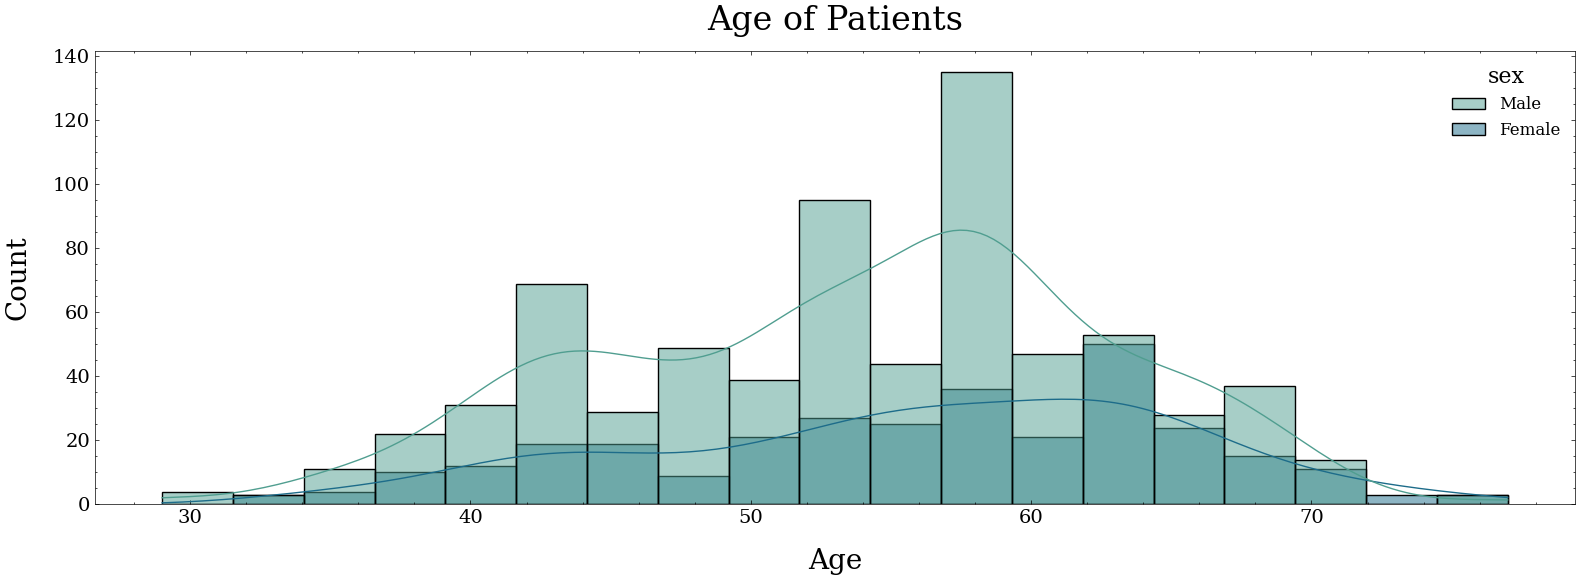

In [55]:
# Age distribution by sex with KDE
fig, ax = plt.subplots(figsize=figsize)
sns.histplot(
    data=df_heart,
    x='age',
    hue='sex',
    kde=True,
    palette='crest'
)
ax.set_xlabel(column_to_title('age'))
ax.set_title('Age of Patients')
plt.tight_layout()
plt.show()
plt.close()

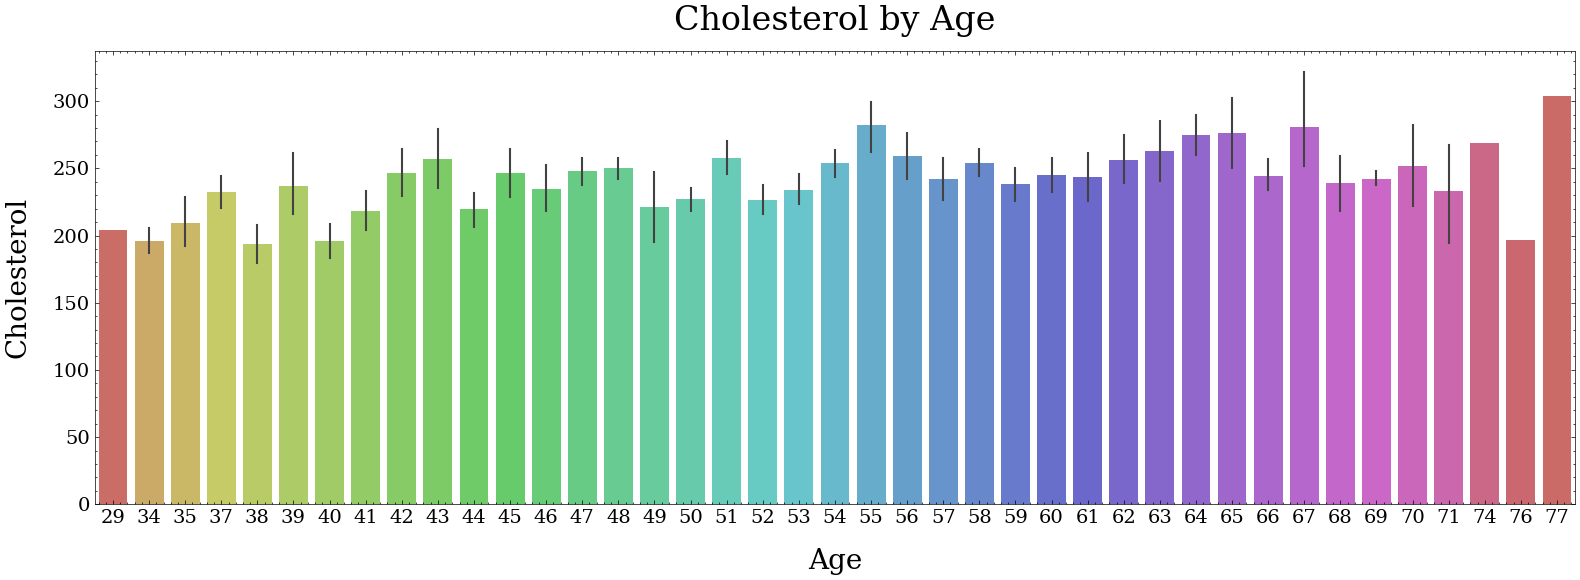

In [56]:
# Cholesterol by age
fig, ax = plt.subplots(figsize=figsize)
sns.barplot(
    data=df_heart,
    x='age',
    y='cholesterol',
    hue='age',
    palette='hls',
    legend=False
)
ax.set_xlabel(column_to_title('age'))
ax.set_ylabel(column_to_title('cholesterol'))
ax.set_title('Cholesterol by Age')
plt.tight_layout()
plt.show()
plt.close()

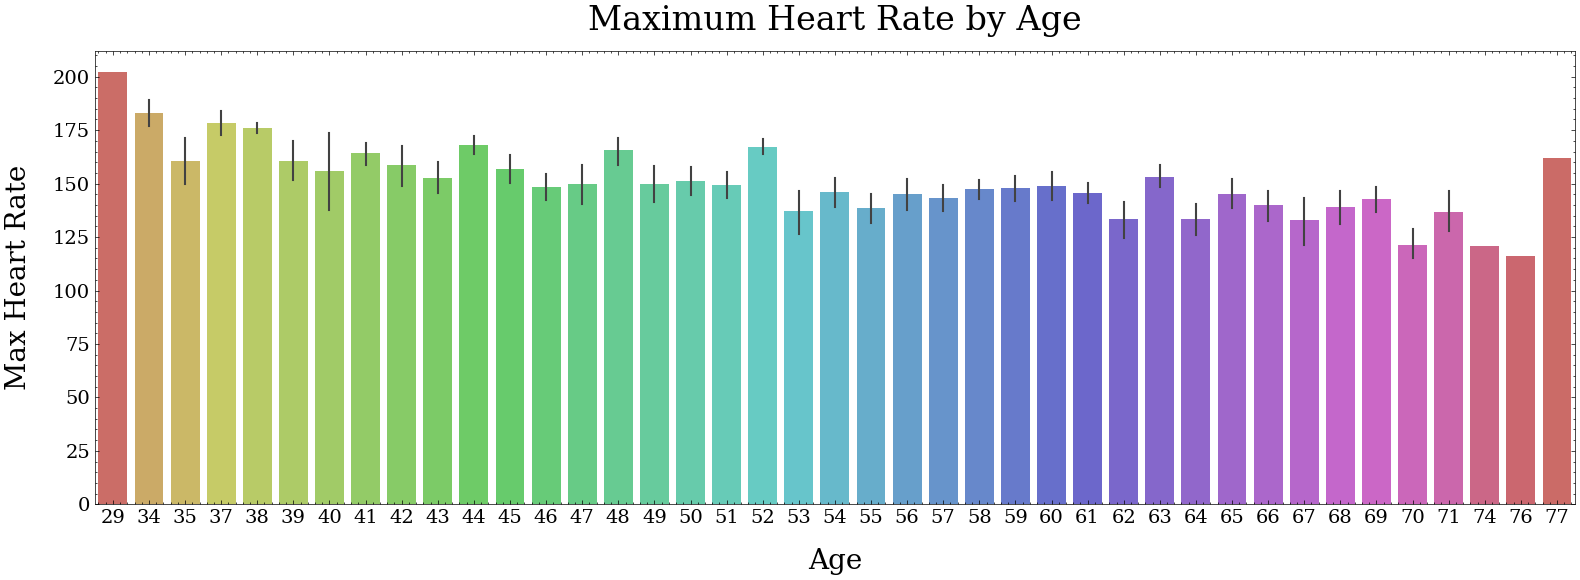

In [57]:
# Max heart rate by age
fig, ax = plt.subplots(figsize=figsize)
sns.barplot(
    data=df_heart,
    x='age',
    y='max_heart_rate',
    hue='age',
    palette='hls',
    legend=False
)
ax.set_xlabel(column_to_title('age'))
ax.set_ylabel(column_to_title('max_heart_rate'))
ax.set_title('Maximum Heart Rate by Age')
plt.tight_layout()
plt.show()
plt.close()

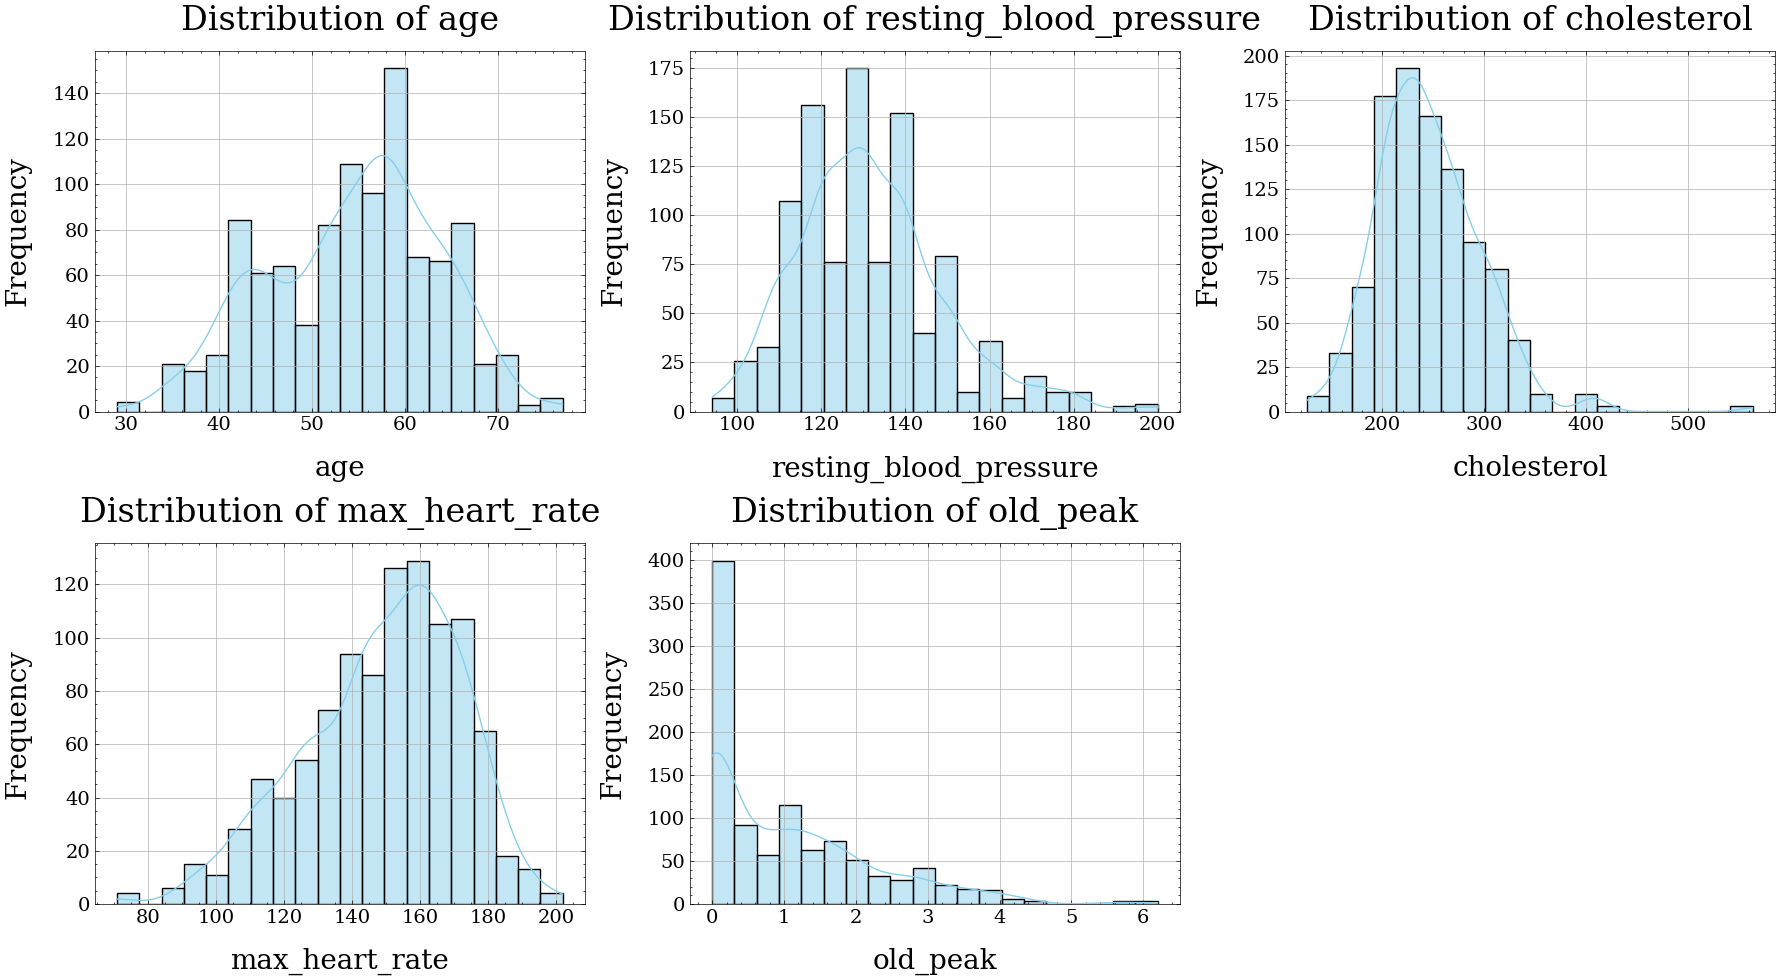

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numerical(df, numerical_columns):
    # Set up the plot grid
    num_plots = len(numerical_columns)
    rows = (num_plots // 3) + 1  # Arrange plots in a grid of 3 columns

    fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_columns):
        sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue', bins=20)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True)

    # Remove unused subplots if any
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function
plot_numerical(df_heart, numerical)

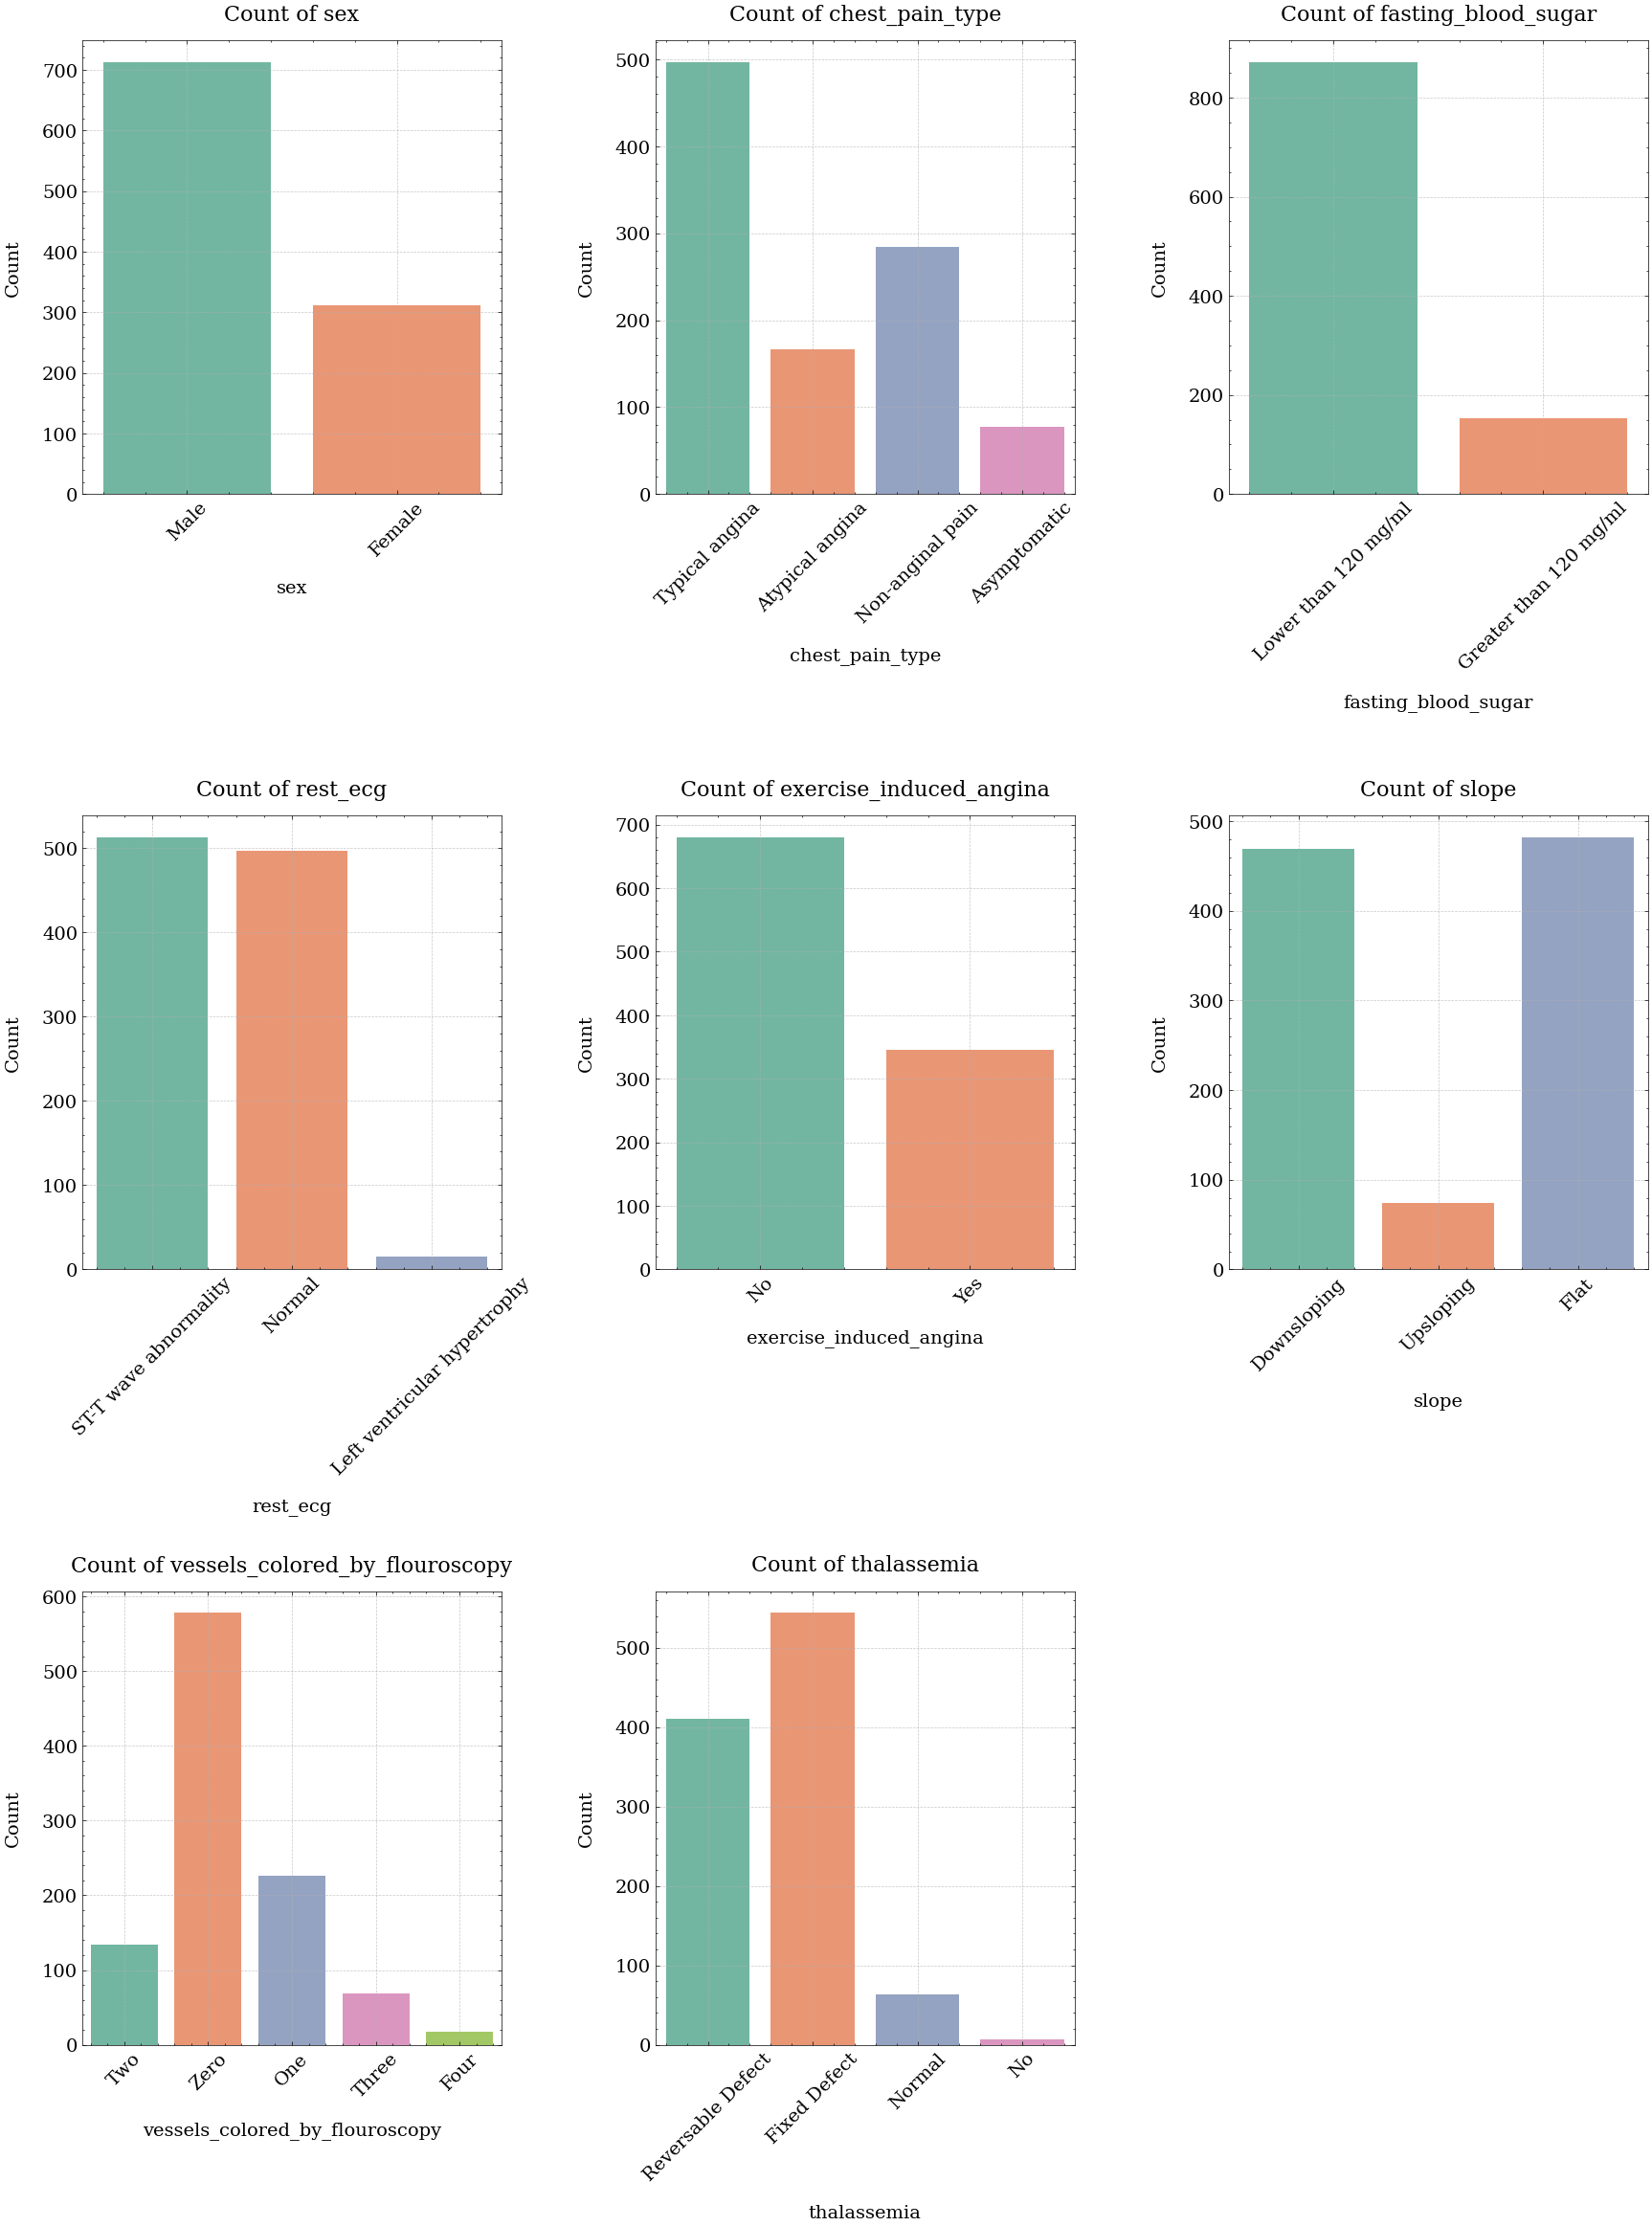

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical(df, categorical_columns):
    # Set up the plot grid
    num_plots = len(categorical_columns)
    rows = (num_plots // 3) + 1  # Arrange plots in a grid of 3 columns

    # Adjust figsize for taller plots (increase height to make graphs taller)
    fig, axes = plt.subplots(rows, 3, figsize=(18, 8 * rows))  # Increase height to make plots taller
    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        # Assign 'x' to 'hue' to avoid the warning
        sns.countplot(x=col, data=df, ax=axes[i], hue=col, palette='Set2', legend=False)
        axes[i].set_title(f'Count of {col}', fontsize=16)
        axes[i].set_xlabel(col, fontsize=14)
        axes[i].set_ylabel('Count', fontsize=14)
        axes[i].grid(True, linestyle='--', alpha=0.7)

        # Rotate the x-axis labels to avoid overlapping
        axes[i].tick_params(axis='x', rotation=45)

    # Remove unused subplots if any
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Add more padding between plots
    plt.tight_layout(pad=3.0)

    plt.show()

# Call the function
plot_categorical(df_heart, categorical)

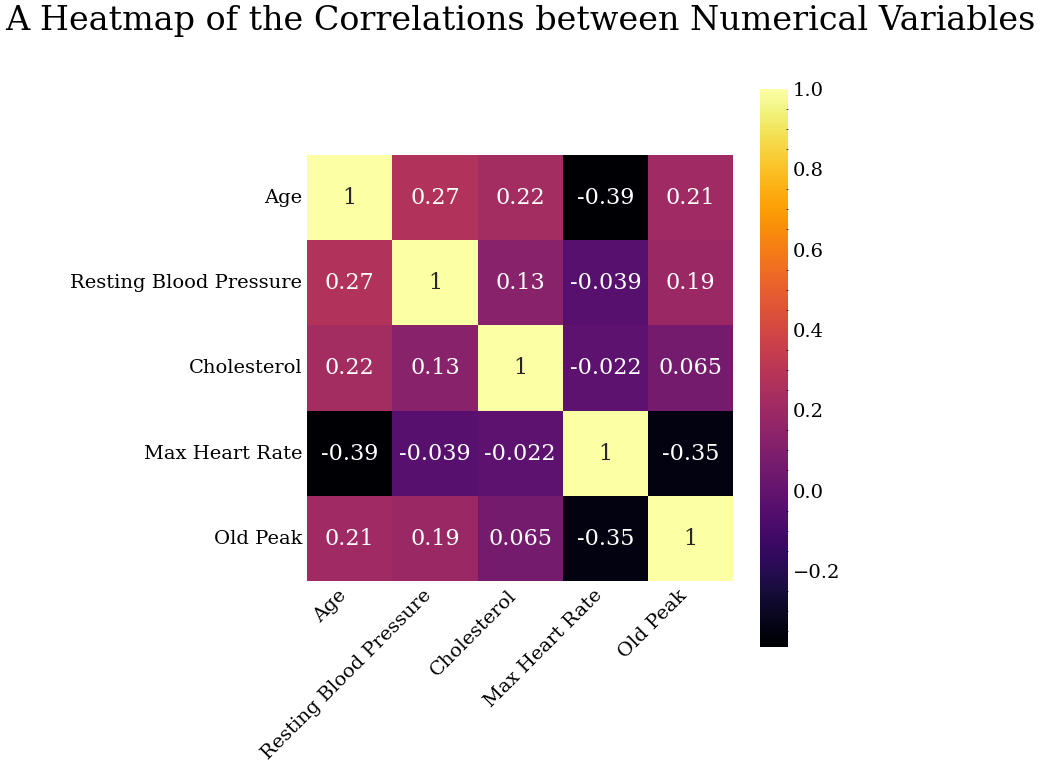

In [74]:
# Plot correlation heatmap
fig, ax = plt.subplots(figsize=(8, 8))
correlation = df_heart.drop('target', axis=1).select_dtypes('number').corr()
heatmap = sns.heatmap(
    correlation,
    annot=True,
    annot_kws={'size': 16},
    cmap='inferno',
    square=True
)

# Set labels for the heatmap
x_labels = [column_to_title(col) for col in correlation.columns]
y_labels = [column_to_title(col) for col in correlation.index]
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_yticklabels(y_labels)

# Adjust appearance of ticks and colorbar
ax.tick_params(axis='both', which='both', length=0)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(length=0)

# Set title
ax.set_title('A Heatmap of the Correlations between Numerical Variables', pad=90)

plt.tight_layout()
plt.show()
plt.close()

# DATA PREPROCESSING

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [76]:
# Mapping values in 'vessels_colored_by_flouroscopy' column to integers
df_heart['vessels_colored_by_flouroscopy'] = df_heart['vessels_colored_by_flouroscopy'].map({
    'Zero': 0,
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
})

In [77]:
# Convert the 'vessels_colored_by_flouroscopy' column to numeric type (integer)
df_heart['vessels_colored_by_flouroscopy'] = pd.to_numeric(
    df_heart['vessels_colored_by_flouroscopy'], downcast='integer'
)

In [78]:
# Create a copy of the dataframe for regression analysis
df_heart_regression = df_heart.copy()

In [79]:
# Create dummy variables for categorical columns
df_categorical = pd.get_dummies(df_heart_regression[categorical], drop_first=True)  # drop_first to avoid multicollinearity

In [80]:
# Transform column names to snake_case for consistency
df_categorical.columns = (
    df_categorical.columns
    .str.lower()  # Convert to lowercase
    .str.replace(' ', '_')  # Replace spaces with underscores
    .str.replace('-', '_')  # Replace hyphens with underscores
    .str.replace('/', '_')  # Replace slashes with underscores
)

In [81]:
# Add the dummy variables to the original dataframe
df_heart_regression = pd.concat([df_heart_regression, df_categorical], axis=1)

In [82]:
# Drop the original categorical columns
df_heart_regression.drop(columns=categorical, inplace=True)

In [83]:
# Preview the updated dataframe
print(df_heart_regression.head())

   age  resting_blood_pressure  cholesterol  max_heart_rate  old_peak  target  \
0   52                     125          212             168       1.0       0   
1   53                     140          203             155       3.1       0   
2   70                     145          174             125       2.6       0   
3   61                     148          203             161       0.0       0   
4   62                     138          294             106       1.9       0   

   sex_male  chest_pain_type_atypical_angina  \
0      True                            False   
1      True                            False   
2      True                            False   
3      True                            False   
4     False                            False   

   chest_pain_type_non_anginal_pain  chest_pain_type_typical_angina  \
0                             False                            True   
1                             False                            True   
2          

In [84]:
# Split the dataset into training and testing sets (80/20 split)
df_train_lr_sm, df_test_lr_sm = train_test_split(df_heart_regression, test_size=0.20, random_state=42)


In [85]:
# Show the shape of the training and test sets
print(f"Training set shape: {df_train_lr_sm.shape}")
print(f"Test set shape: {df_test_lr_sm.shape}")

Training set shape: (820, 19)
Test set shape: (205, 19)


In [88]:
scaler = StandardScaler()

In [90]:
scaler.fit(df_train_lr_sm[numerical])


StandardScaler()

In [91]:
df_train_lr_sm[numerical] = scaler.transform(df_train_lr_sm[numerical])

In [92]:
df_test_lr_sm[numerical] = scaler.transform(df_test_lr_sm[numerical])

In [93]:
print(df_train_lr_sm.head())

          age  resting_blood_pressure  cholesterol  max_heart_rate  old_peak  \
835 -0.585840               -0.779454    -1.935031       -1.019094 -0.210661   
137  1.051477                2.741732     1.610634        0.202882 -0.912152   
534 -0.040068               -1.347387     0.442176        0.770228 -0.912152   
495  0.505705                0.186033    -0.222636        0.508376 -0.473720   
244 -0.367531               -0.381900    -0.001032        0.726586  1.192321   

     target  sex_male  chest_pain_type_atypical_angina  \
835       0      True                            False   
137       1     False                            False   
534       1     False                            False   
495       1      True                            False   
244       1      True                            False   

     chest_pain_type_non_anginal_pain  chest_pain_type_typical_angina  \
835                              True                           False   
137                     

# BUILD MODEL

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.inspection import permutation_importance
from matplotlib.patches import Patch

In [95]:
# Prepare formula for logistic regression
column = df_heart_regression.columns.tolist()
column.remove('target')

formula = 'target ~ ' + ' + '.join(column)

In [96]:
# Define logistic regression model
model = smf.logit(formula, data=df_train_lr_sm)

In [97]:
# Fit the model to the training data
results = model.fit()

         Current function value: 0.347679
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals


In [98]:
# Display model summary
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  820
Model:                          Logit   Df Residuals:                      801
Method:                           MLE   Df Model:                           18
Date:                Tue, 10 Dec 2024   Pseudo R-squ.:                  0.4980
Time:                        06:29:15   Log-Likelihood:                -285.10
converged:                      False   LL-Null:                       -567.97
Covariance Type:            nonrobust   LLR p-value:                1.479e-108
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.0509      1.247      2.447      0.014       0.607       5.495
sex_male[T.True] 

In [99]:
# Calculate feature importance
df_importance = pd.DataFrame(
    {
        'variable': results.params.index,
        'importance': results.params.values,
    }
)

In [100]:
# Clean the variable names (if needed)
df_importance['variable'] = df_importance['variable'].str.replace('[T.True]', '', regex=False)

In [101]:
# Separate positive and negative importance values
positive_importance = df_importance[df_importance.importance > 0]
negative_importance = df_importance[df_importance.importance < 0]

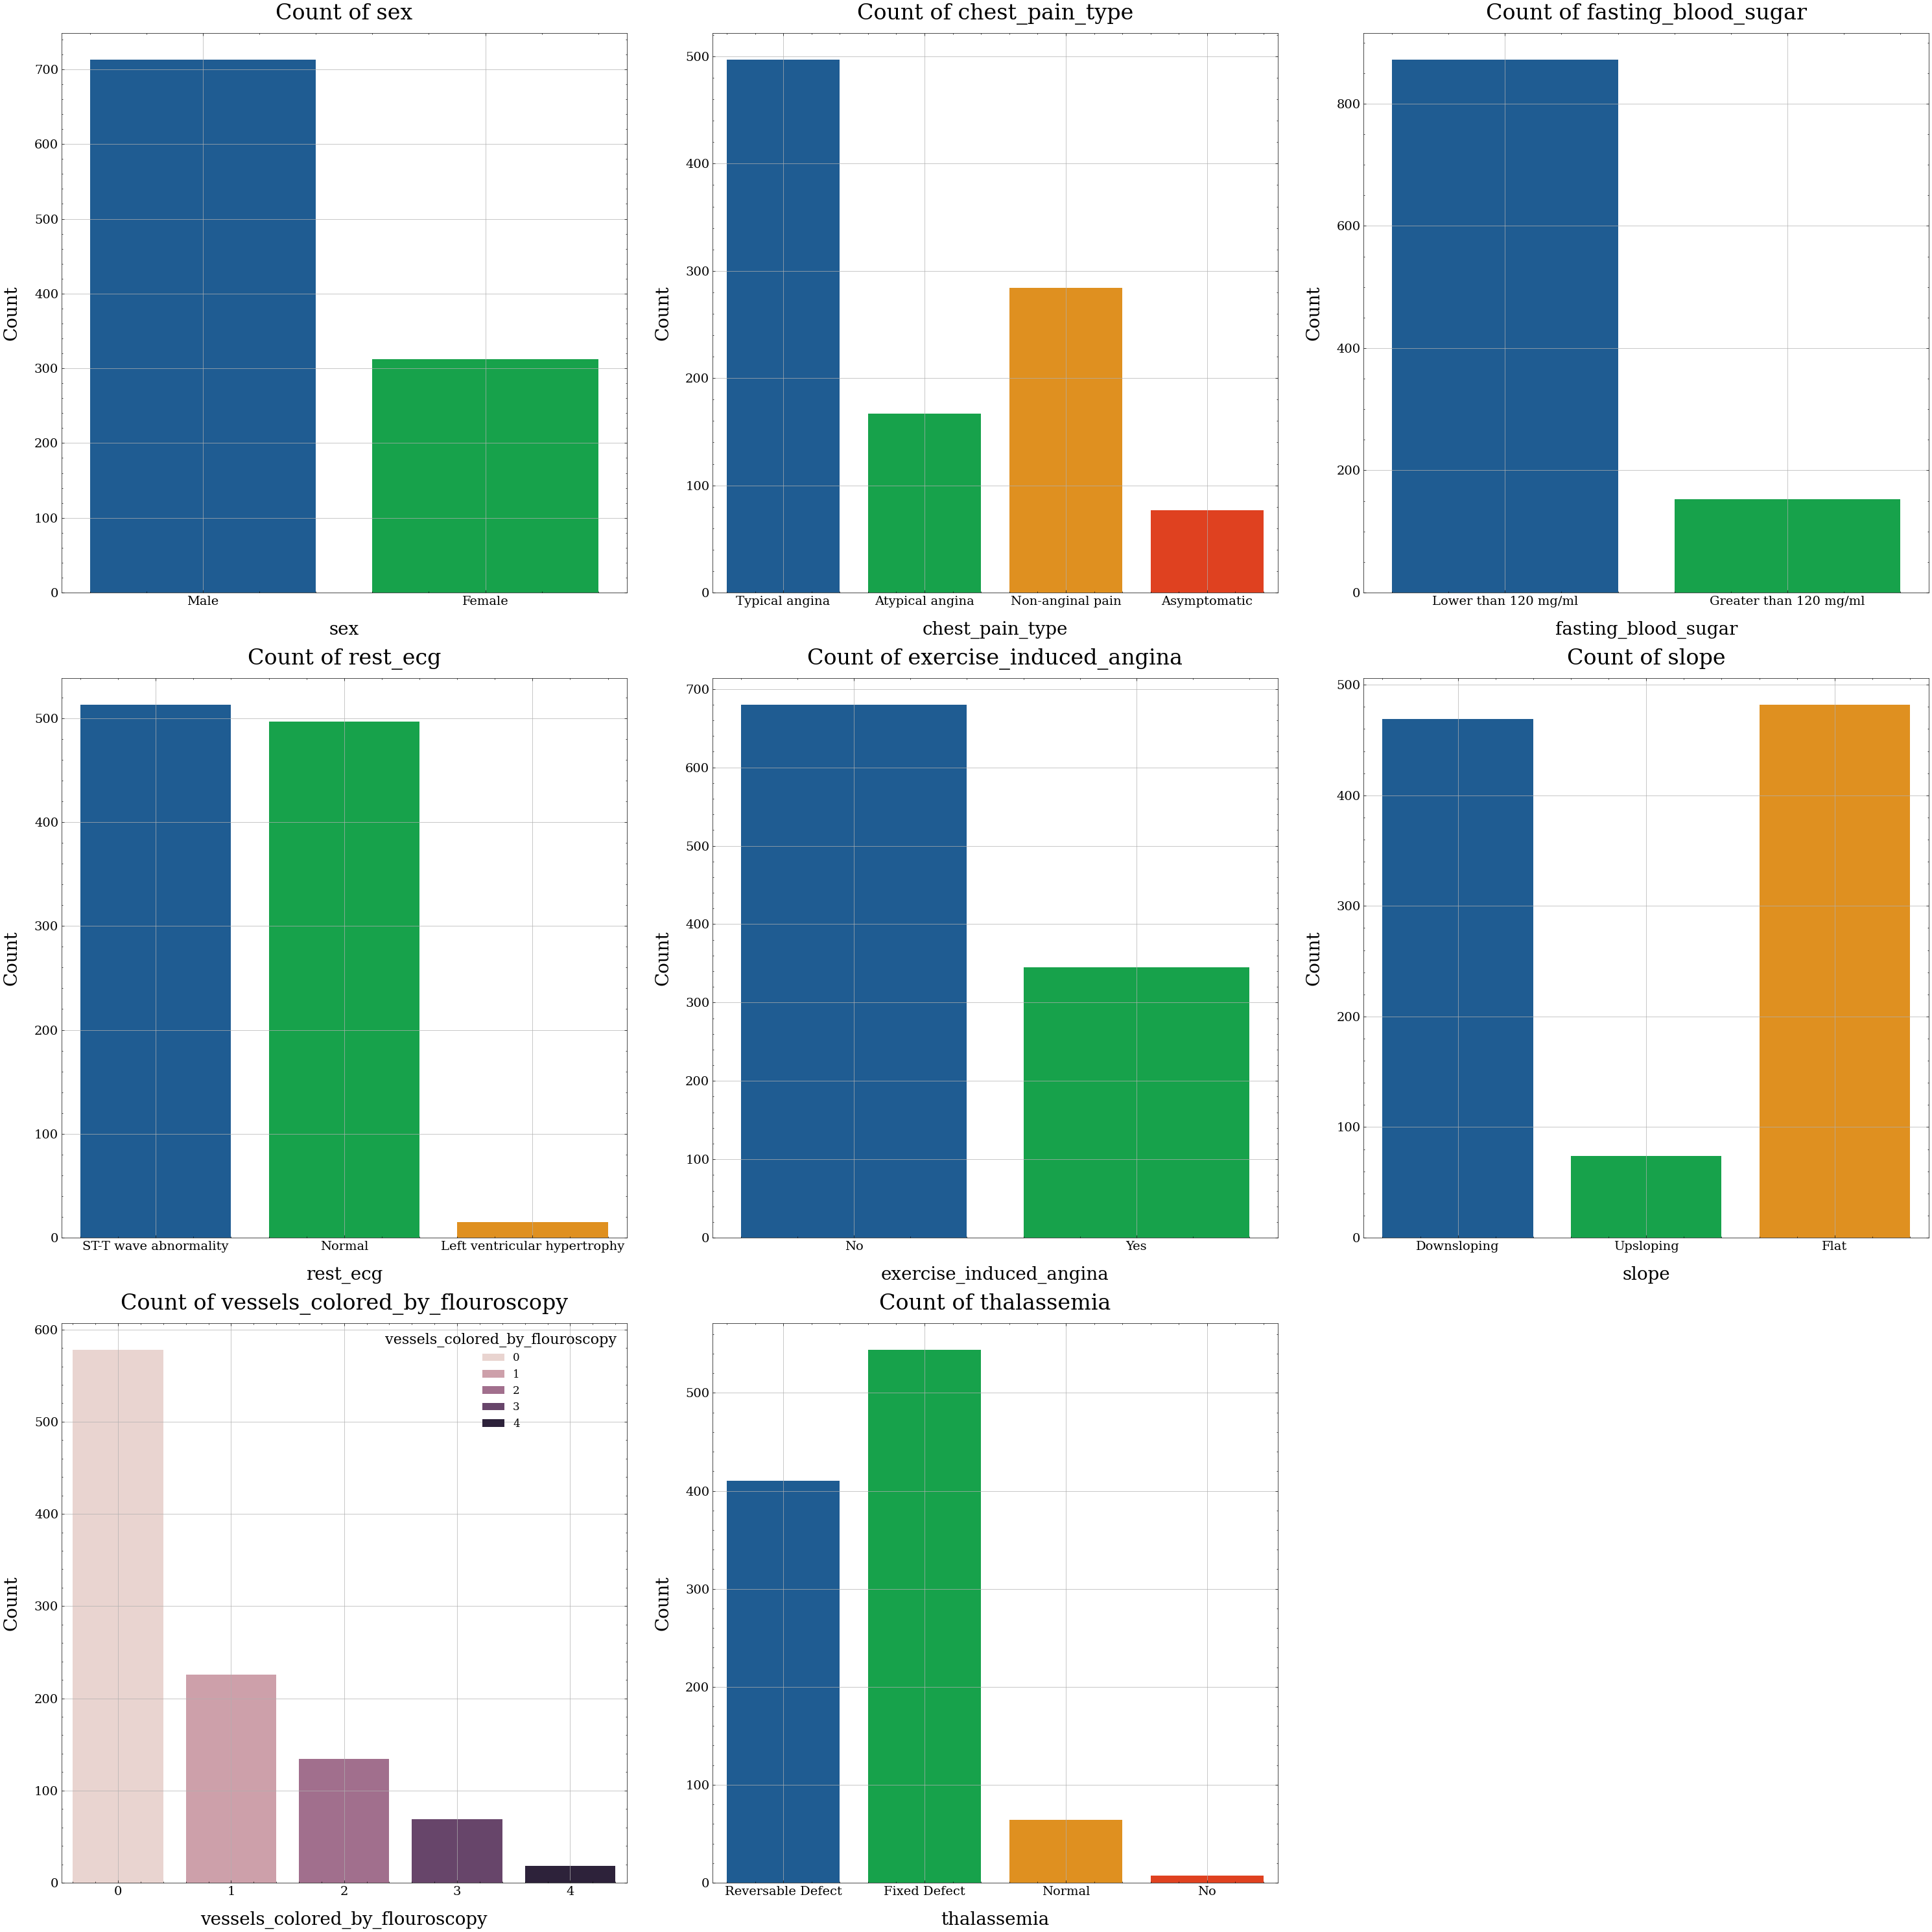

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical(df, categorical_columns):
    # Set up the plot grid
    num_plots = len(categorical_columns)
    rows = (num_plots // 3) + 1  # Arrange plots in a grid of 3 columns

    # Increase figure size for longer and taller graphs
    fig, axes = plt.subplots(rows, 3, figsize=(30, 10 * rows))  # Increased figsize width and height
    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        sns.countplot(x=col, data=df, ax=axes[i], hue=col)  # Added hue=col to avoid warning
        axes[i].set_title(f'Count of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].grid(True)

    # Remove unused subplots if any
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
plot_categorical(df_heart, categorical)

In [108]:
# Predict probabilities in the test dataset
df_test_lr_sm['target_probability'] = results.predict(df_test_lr_sm).round(2)

In [109]:
# Set a threshold of 0.5 for classification
df_test_lr_sm['target_prediction'] = (df_test_lr_sm['target_probability'] > 0.5).astype(int)

In [110]:
# Define plotting function for numerical features
def plot_target_predictions(df_train, df_test, numerical_columns):
    for y in numerical_columns:
        figsize = (16, 6)
        fig, ax = plt.subplots(figsize=figsize)

        # Strip plot: target vs. predictions for training data and test data
        sns.stripplot(
            data=df_train,
            x='target',
            y=y,
            color='red',
            label='Target',
            alpha=0.50,
            ax=ax
        )

        sns.stripplot(
            data=df_test,
            x='target_prediction',
            y=y,
            color='black',
            label='Predicted Target',
            alpha=0.75,
            ax=ax
        )

        # Set titles and labels
        ax.set_xlabel(column_to_title('target'))
        ax.set_ylabel(column_to_title(y))

        # Handle legend
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(
            handles=handles,
            labels=labels,
            loc='upper left',
            bbox_to_anchor=(1, 1)
        )

        ax.set_title(f'Target vs. Target Prediction in {column_to_title(y)}')

        plt.tight_layout()
        plt.show()

        # Close plot to avoid overlap in subsequent plots
        plt.close()

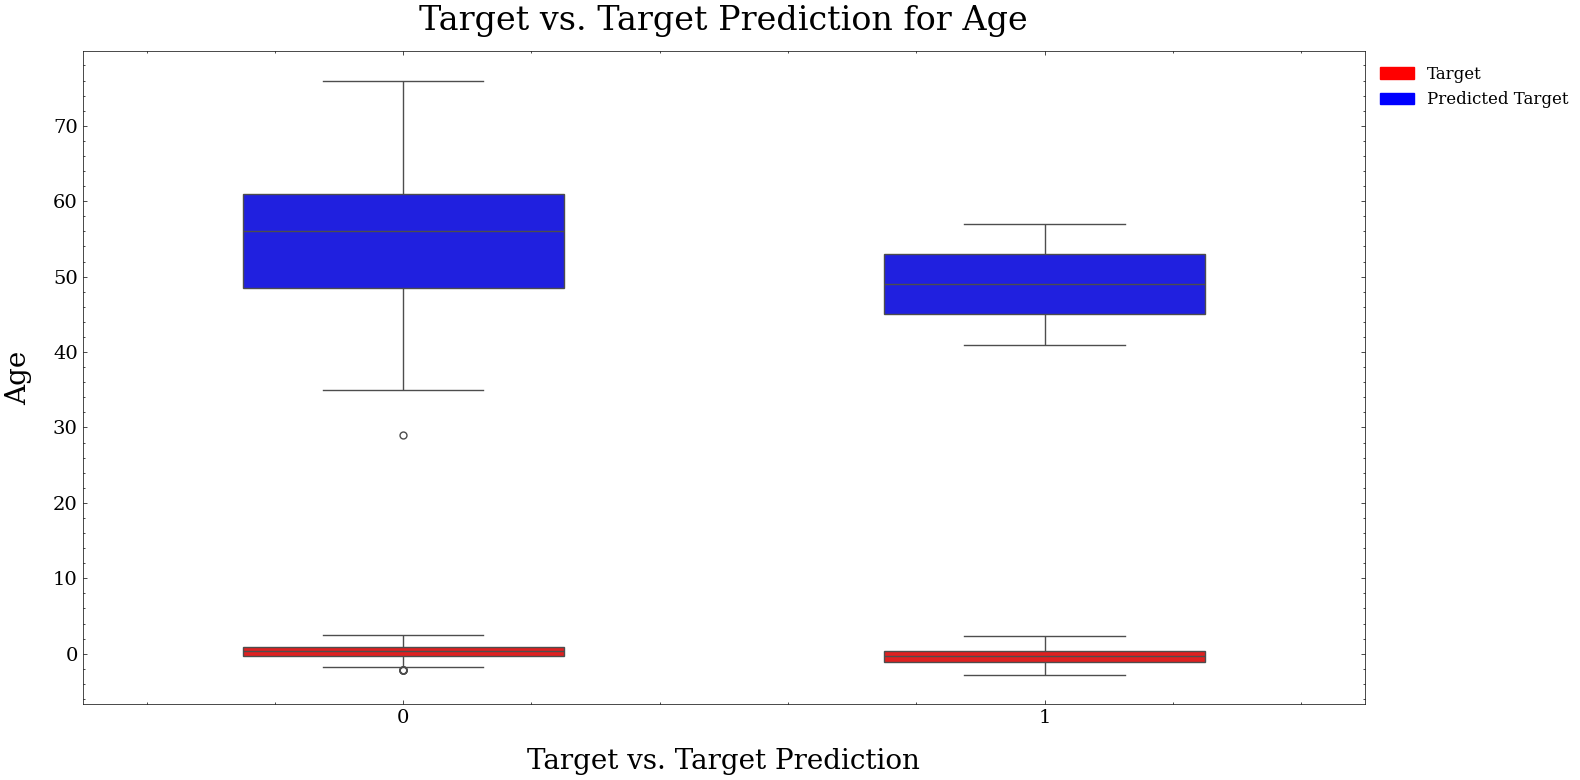

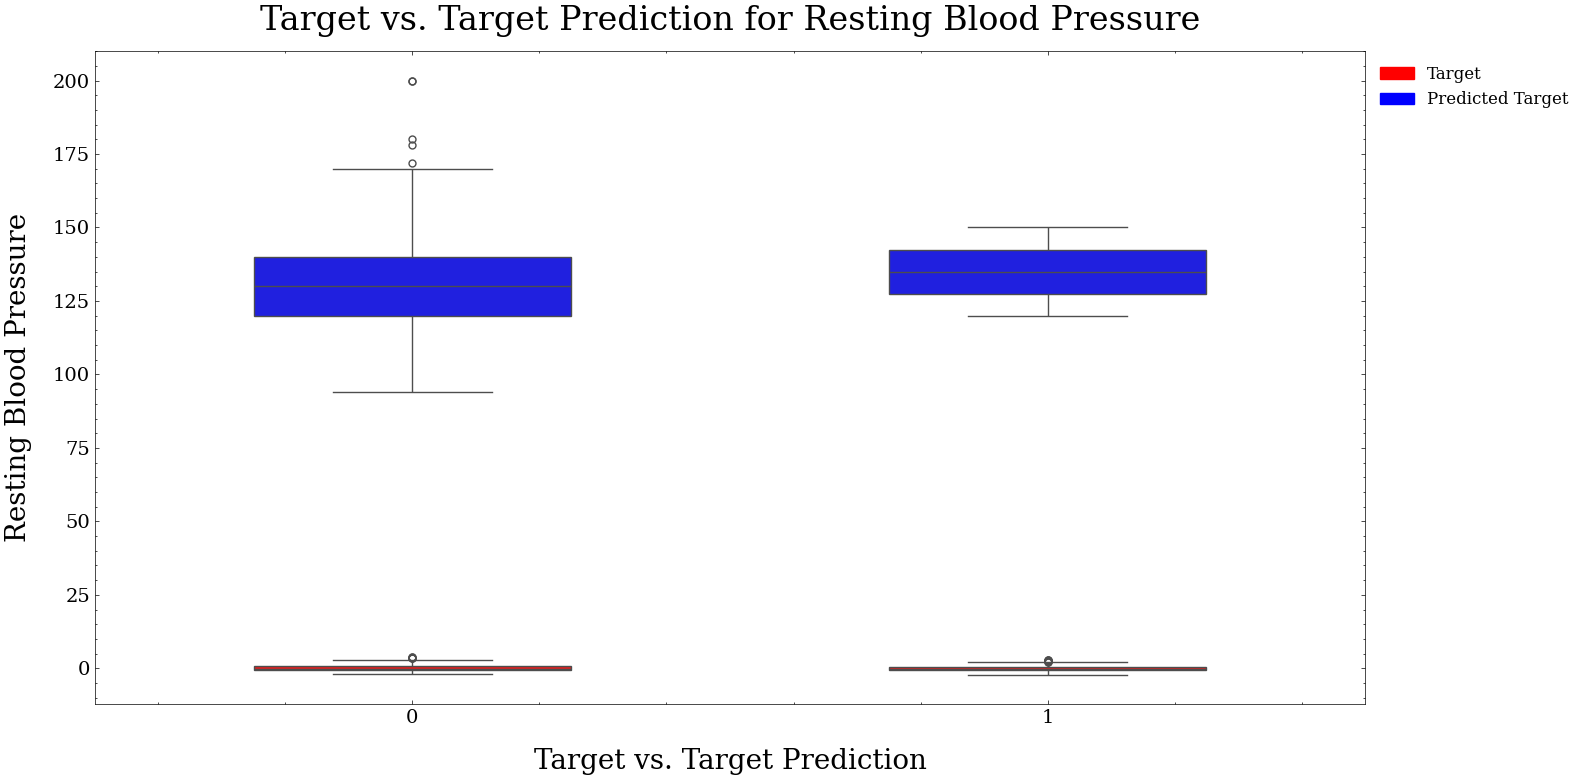

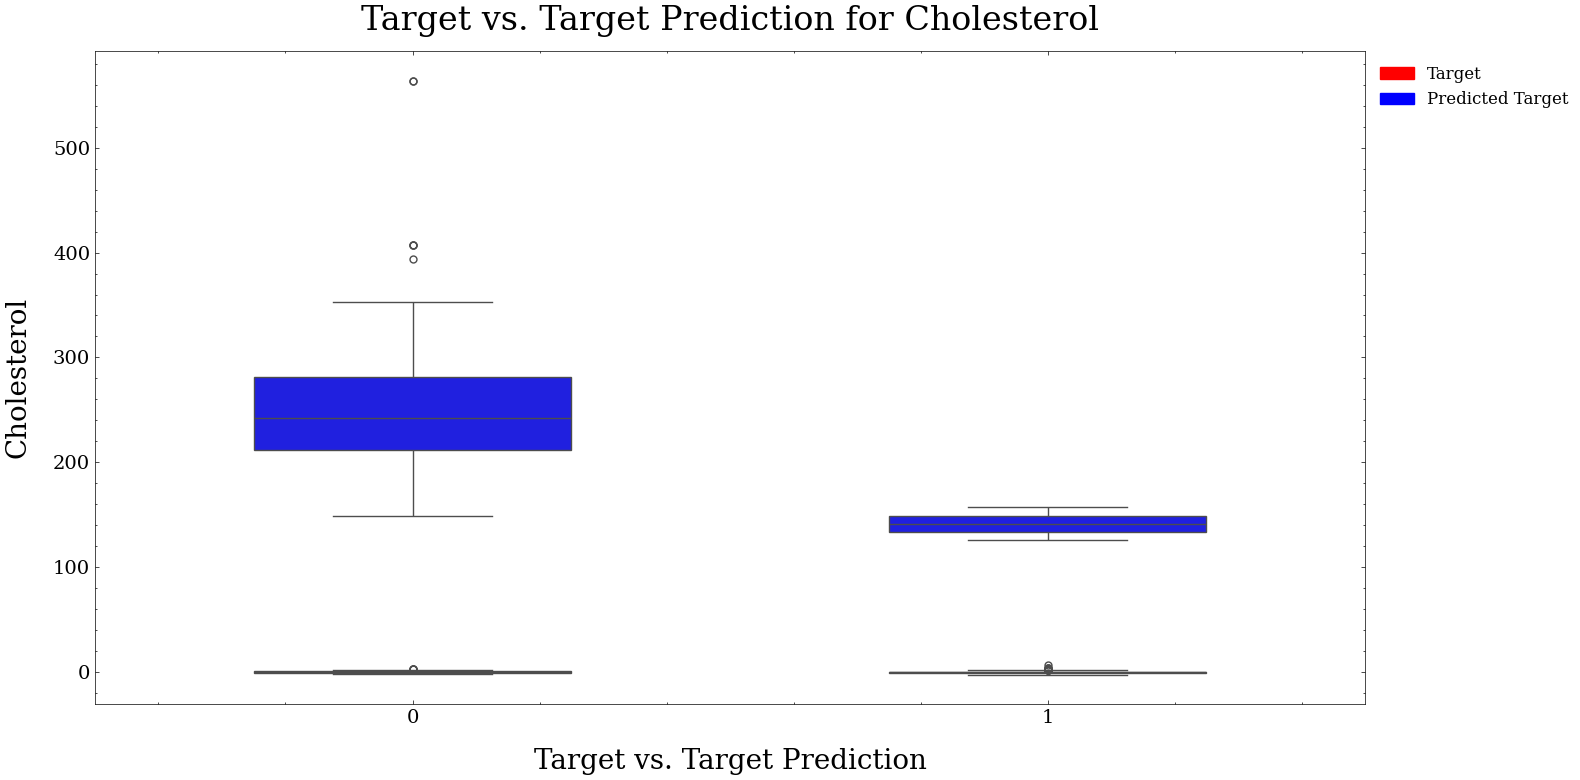

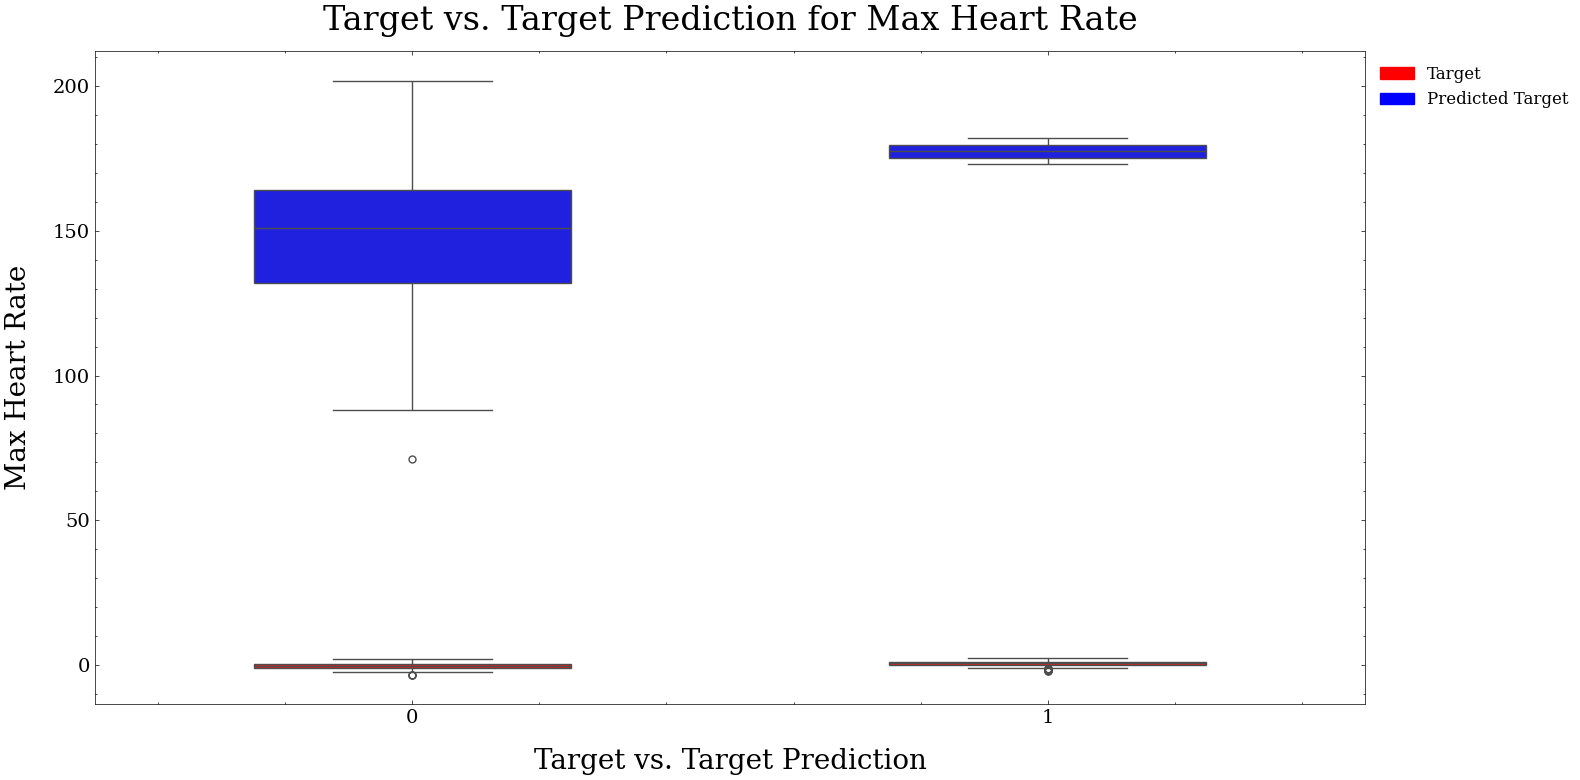

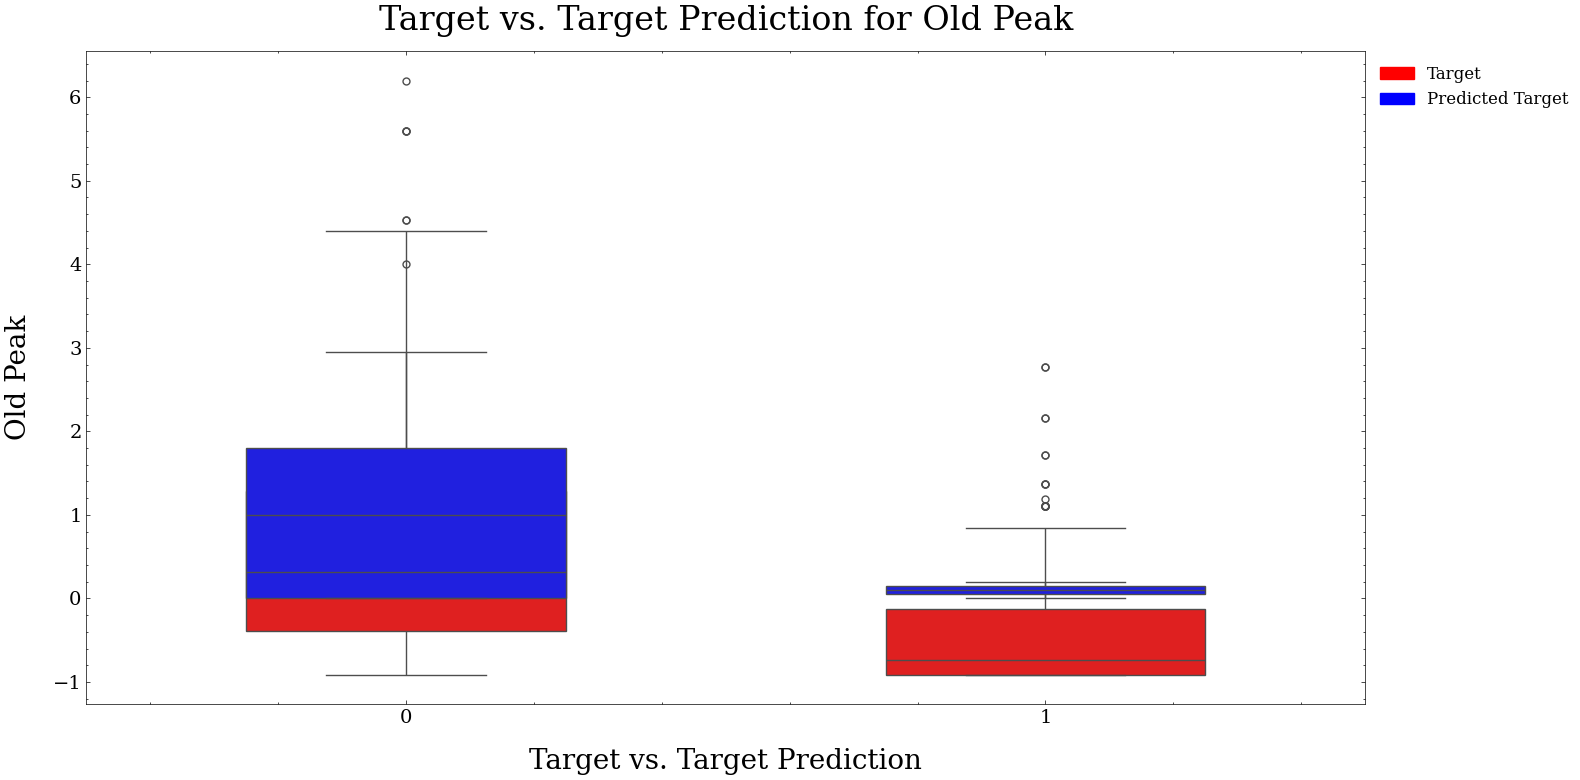

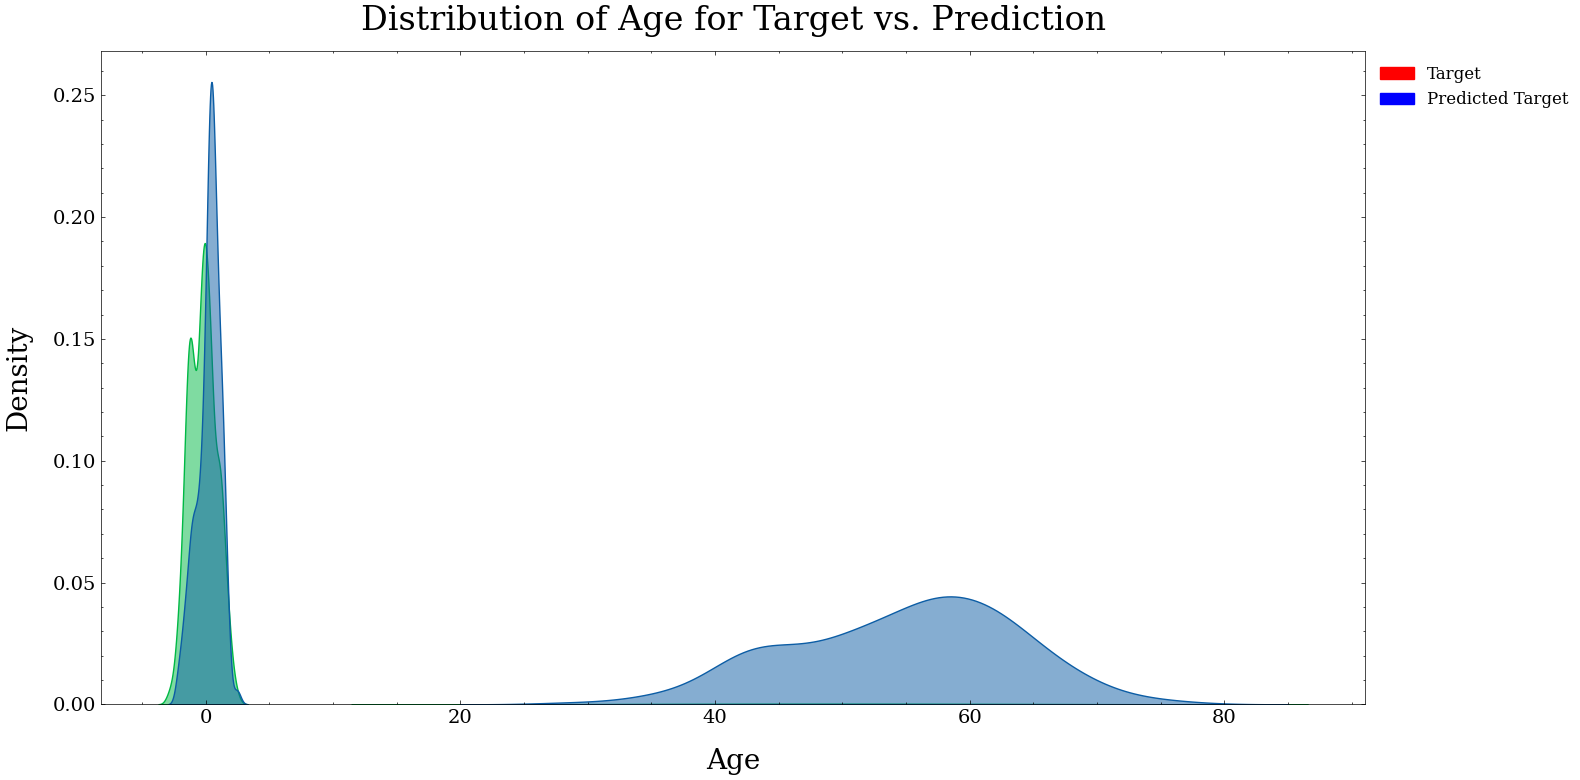

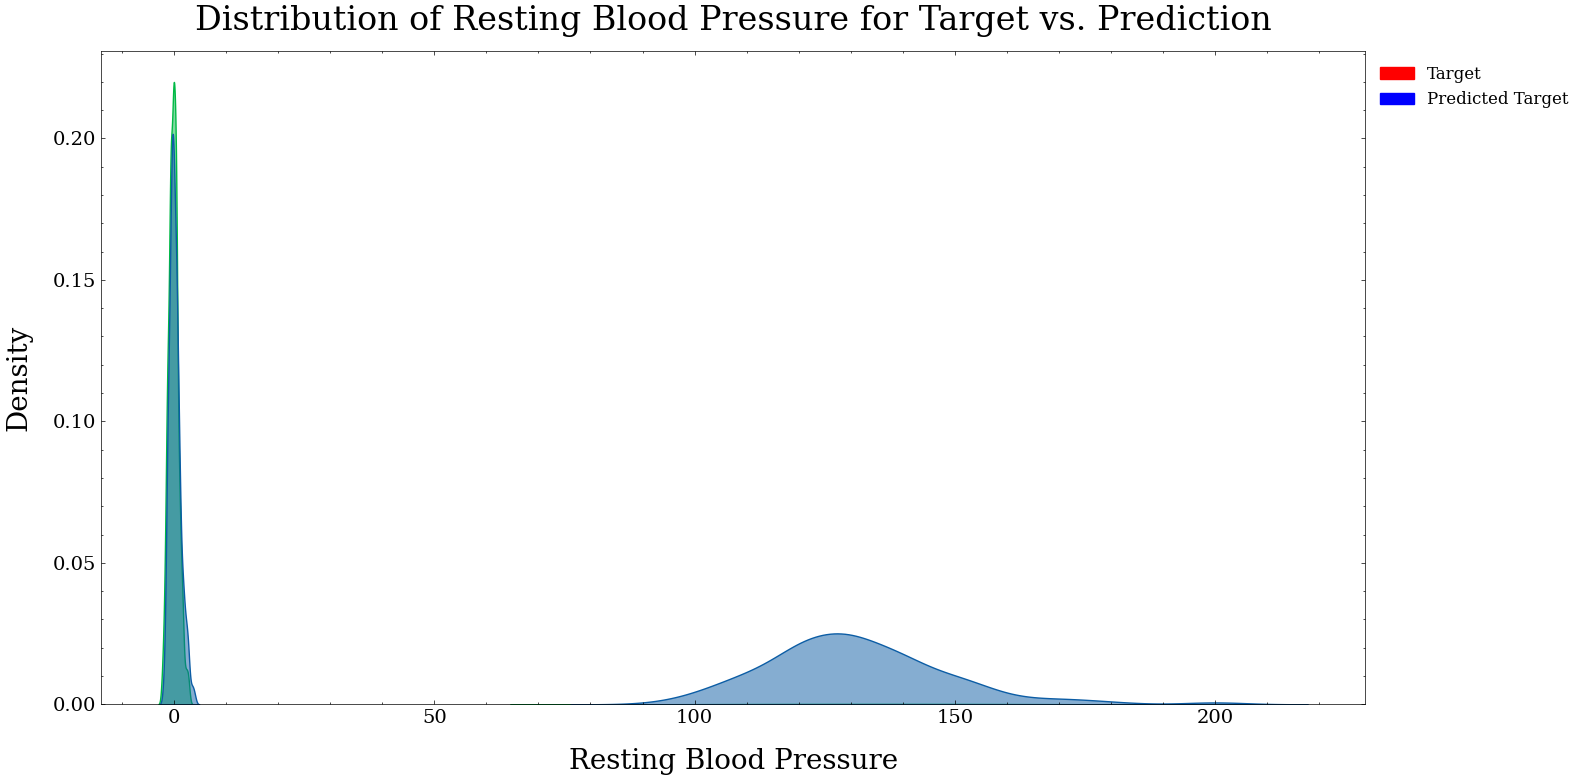

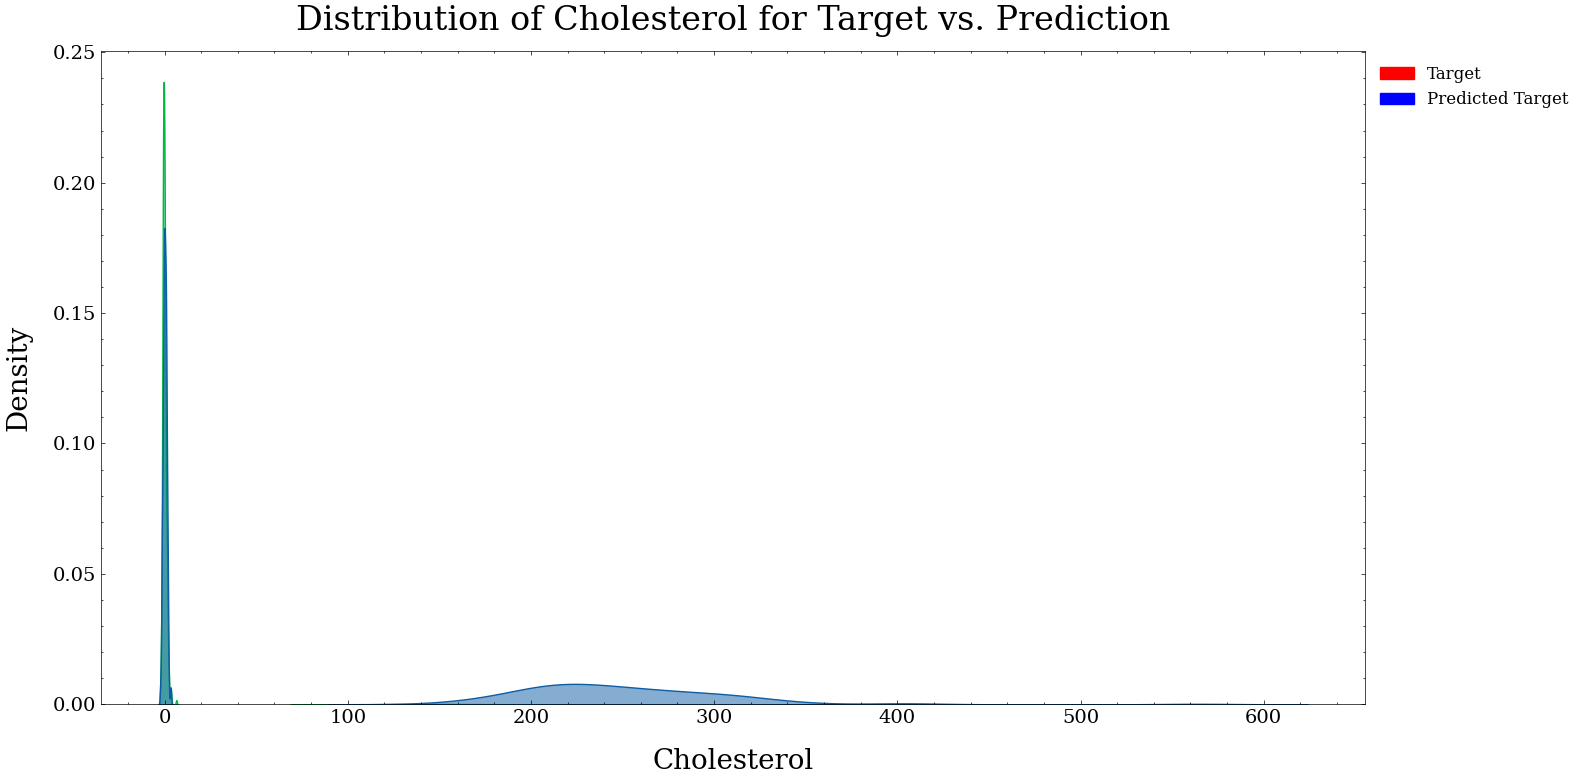

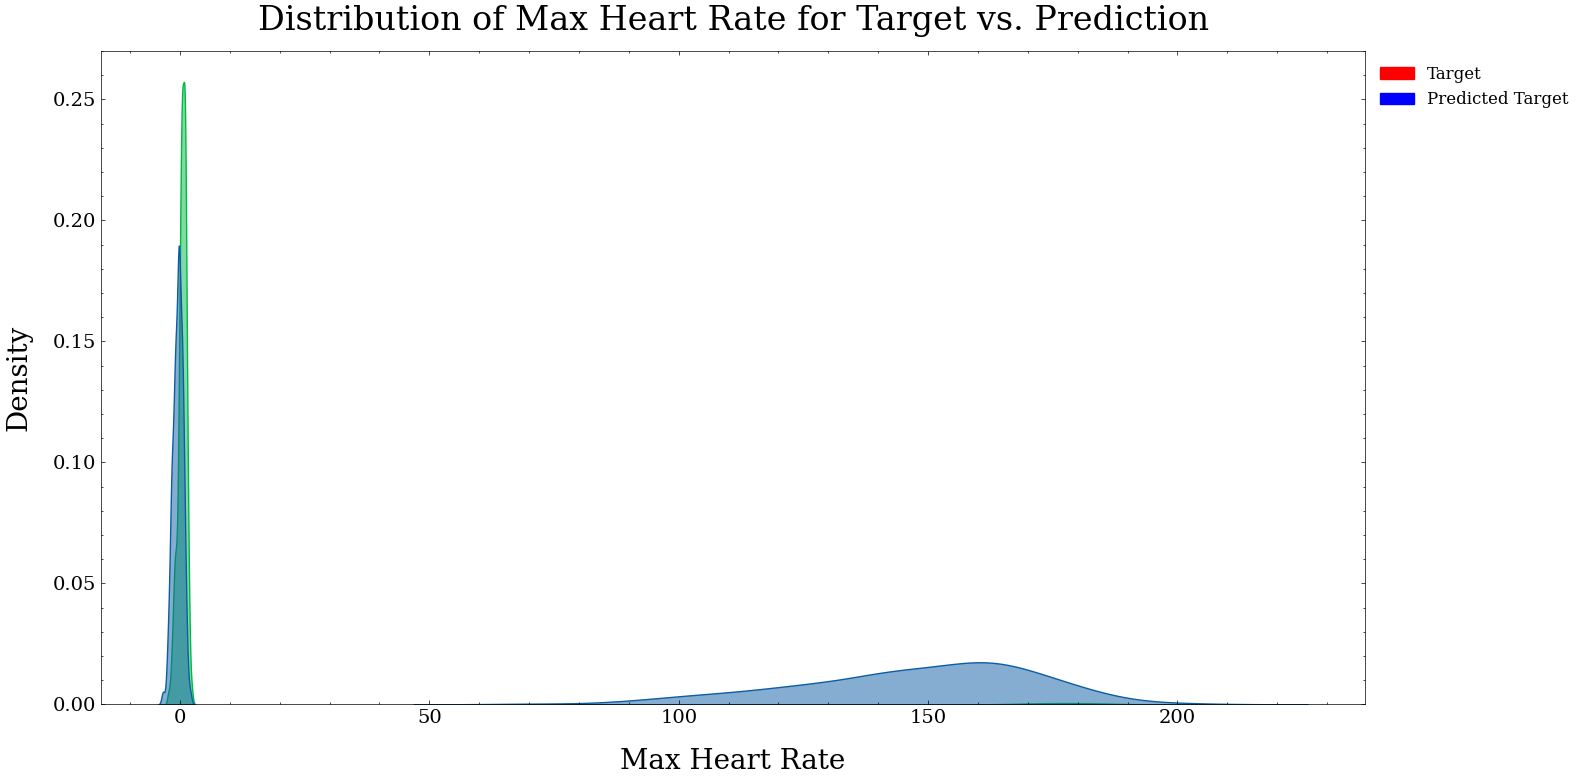

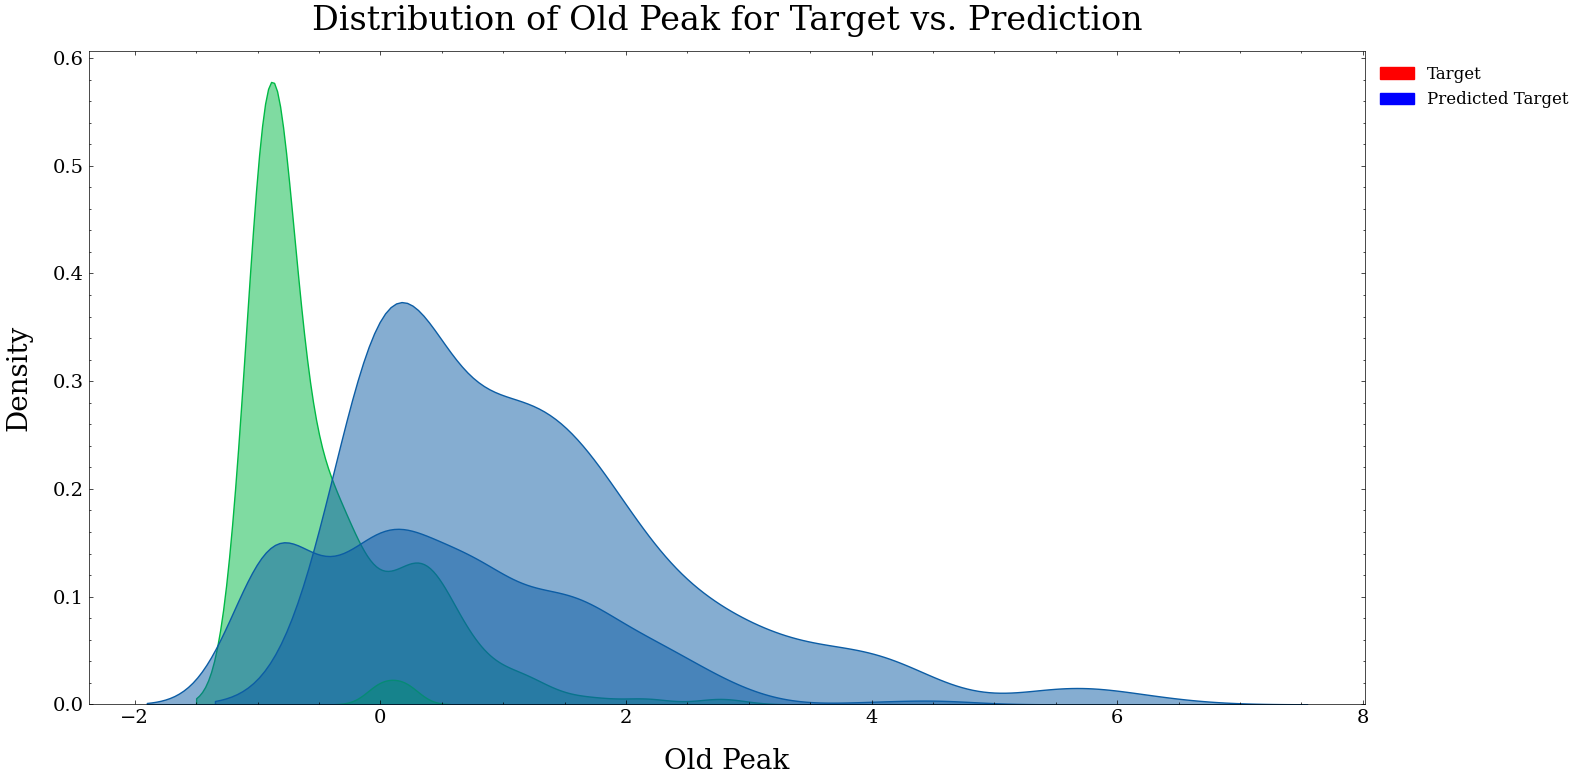

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_target_predictions(df_train, df_test, numerical):
    # Loop over each numerical feature
    for y in numerical:
        figsize = (16, 8)  # Adjusted figsize for more space
        fig, ax = plt.subplots(figsize=figsize)

        # Plot the distribution of target vs. predicted target using boxplot or violinplot
        sns.boxplot(
            data=df_train,
            x='target',
            y=y,
            color='red',
            width=0.5,
            fliersize=5,
            ax=ax
        )

        sns.boxplot(
            data=df_test,
            x='target_prediction',
            y=y,
            color='blue',
            width=0.5,
            fliersize=5,
            ax=ax
        )

        # Customize labels and title
        ax.set_xlabel('Target vs. Target Prediction')
        ax.set_ylabel(column_to_title(y))
        ax.set_title(f'Target vs. Target Prediction for {column_to_title(y)}')

        # Customize the legend manually
        handles = [
            Patch(facecolor='red', edgecolor='red', label='Target'),
            Patch(facecolor='blue', edgecolor='blue', label='Predicted Target')
        ]

        ax.legend(
            handles=handles,
            loc='upper left',
            bbox_to_anchor=(1, 1)
        )

        plt.tight_layout()
        plt.show()
        plt.close()

    # KDE plot for density estimation
    for x in numerical:
        figsize = (16, 8)  # Adjusted figsize for more space
        fig, ax = plt.subplots(figsize=figsize)

        sns.kdeplot(
            data=df_train,
            x=x,
            hue='target',
            fill=True,
            color='red',
            alpha=0.5,
            ax=ax
        )

        sns.kdeplot(
            data=df_test,
            x=x,
            hue='target_prediction',
            fill=True,
            color='blue',
            alpha=0.5,
            ax=ax
        )

        # Customize labels and title
        ax.set_xlabel(column_to_title(x))
        ax.set_ylabel('Density')
        ax.set_title(f'Distribution of {column_to_title(x)} for Target vs. Prediction')

        # Customize the legend
        handles = [
            Patch(facecolor='red', edgecolor='red', label='Target'),
            Patch(facecolor='blue', edgecolor='blue', label='Predicted Target')
        ]

        ax.legend(
            handles=handles,
            loc='upper left',
            bbox_to_anchor=(1, 1)
        )

        plt.tight_layout()
        plt.show()
        plt.close()

# Example usage:
plot_target_predictions(df_train_lr_sm, df_test_lr_sm, numerical)

# PERFORMANCE ASSESSMENT

In [118]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
import warnings

In [119]:
def display_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred Neg", "Pred Pos"], yticklabels=["True Neg", "True Pos"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [120]:
def display_score(y_true, y_pred, average='binary'):
    score = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {score:.2f}")

In [121]:
def column_to_title(column_name):
    return column_name.replace('_', ' ').title()

In [122]:
# 1. Baseline model
count = df_heart.target.value_counts()
x, y = count
score = x / (y + x)
print(f"Baseline for Naïve model: {score:.2f}")

Baseline for Naïve model: 0.51


In [123]:
# 2. Logistic Regression - Hyperparameter Tuning using GridSearchCV
df_heart_regression = df_heart.copy()

In [124]:
X = df_heart_regression.drop('target', axis=1)
y = df_heart_regression['target']

In [125]:
X_train_lr_sk, X_test_lr_sk, y_train_lr_sk, y_test_lr_sk = train_test_split(X, y, test_size=0.20)
print(X_train_lr_sk.shape, X_test_lr_sk.shape, y_train_lr_sk.shape, y_test_lr_sk.shape)

(820, 13) (205, 13) (820,) (205,)


In [126]:
scaler = StandardScaler()
X_train_lr_sk[numerical] = scaler.fit_transform(X_train_lr_sk[numerical])
X_test_lr_sk[numerical] = scaler.transform(X_test_lr_sk[numerical])

In [127]:
# Parameter grid for Logistic Regression tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'max_iter': [i for i in range(100, 1000, 100)]
}

In [139]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = X_train_lr_sk.select_dtypes(include=['object']).columns

# Apply LabelEncoder for binary categories and OneHotEncoder for multi-class categories
for col in categorical_cols:
    if X_train_lr_sk[col].nunique() == 2:  # Binary category (e.g., Male/Female)
        X_train_lr_sk[col] = LabelEncoder().fit_transform(X_train_lr_sk[col])
    else:  # Apply One-Hot Encoding for multi-class categories
        X_train_lr_sk = pd.get_dummies(X_train_lr_sk, columns=[col], drop_first=True)

# Check the dataset to ensure all categorical variables have been encoded
print(X_train_lr_sk.head())
print(X_train_lr_sk.dtypes)  # Check that all columns are numeric

# GridSearchCV
search_lr_sk = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)
search_lr_sk.fit(X_train_lr_sk, y_train_lr_sk)

          age  sex  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
116  0.948167    1               -0.083804     0.173145                    1   
931 -1.594479    1                1.168750    -0.427147                    1   
739 -0.267881    1               -0.197673     0.192509                    1   
531  1.169267    0                1.339553     0.463609                    1   
913 -1.041730    1               -1.564096    -0.717611                    1   

     max_heart_rate  exercise_induced_angina  old_peak  \
116       -0.103636                        0  0.304952   
931        1.373542                        0 -0.901406   
739        0.504614                        1 -0.901406   
531       -0.060189                        0 -0.212058   
913       -0.060189                        1  1.683647   

     vessels_colored_by_flouroscopy  chest_pain_type_Atypical angina  \
116                               1                            False   
931                       

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700, 800,
                                      900]},
             return_train_score=True, scoring='accuracy')

In [140]:
df_score_lr_sk = pd.DataFrame(search_lr_sk.cv_results_)
for k, v in search_lr_sk.best_params_.items():
    print(f"{k}: {v}")

C: 0.1
max_iter: 100


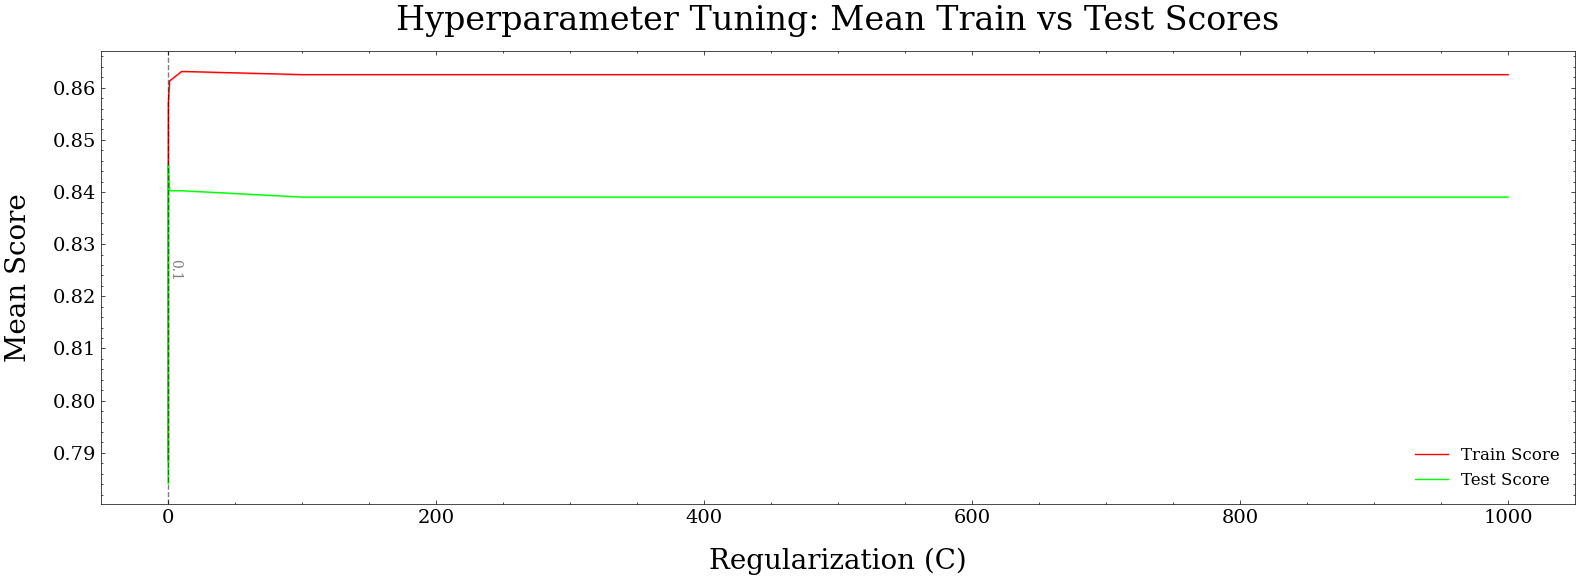

In [142]:
# Plotting Grid Search results
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(data=df_score_lr_sk, x="param_C", y="mean_train_score", label="Train Score", color='red', ax=ax)
sns.lineplot(data=df_score_lr_sk, x="param_C", y="mean_test_score", label="Test Score", color='lime', ax=ax)

x_best = search_lr_sk.best_params_['C']
ax.axvline(x_best, color='black', linestyle='--', alpha=0.5)
plt.text(x_best, 0.5, f'{x_best}', color='black', alpha=0.5, transform=ax.get_xaxis_transform(), rotation=270)

ax.set_xlabel('Regularization (C)')
ax.set_ylabel('Mean Score')
ax.set_title('Hyperparameter Tuning: Mean Train vs Test Scores')

plt.tight_layout()
plt.show()

In [145]:
# Re-apply the encoding to both the training and test sets
X_train_encoded = pd.get_dummies(X_train_lr_sk, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_lr_sk, drop_first=True)

# Ensure that both training and test sets have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Check that columns are aligned
print(X_train_encoded.columns)
print(X_test_encoded.columns)

# Now you can train and predict using the model
model_lr_sk.fit(X_train_encoded, y_train_lr_sk)
y_pred_lr_sk = model_lr_sk.predict(X_test_encoded)

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate', 'exercise_induced_angina',
       'old_peak', 'vessels_colored_by_flouroscopy',
       'chest_pain_type_Atypical angina', 'chest_pain_type_Non-anginal pain',
       'chest_pain_type_Typical angina', 'rest_ecg_Normal',
       'rest_ecg_ST-T wave abnormality', 'slope_Flat', 'slope_Upsloping',
       'thalassemia_No', 'thalassemia_Normal',
       'thalassemia_Reversable Defect'],
      dtype='object')
Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate', 'exercise_induced_angina',
       'old_peak', 'vessels_colored_by_flouroscopy',
       'chest_pain_type_Atypical angina', 'chest_pain_type_Non-anginal pain',
       'chest_pain_type_Typical angina', 'rest_ecg_Normal',
       'rest_ecg_ST-T wave abnormality', 'slope_Flat', 'slope_Upsloping',
       'thalassemia_No', 'thalassemia_Normal',
       'thalassemia_Reversable Defect']

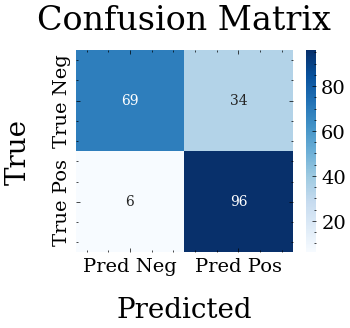

Accuracy: 0.80


In [146]:
# Display confusion matrix and accuracy score
display_confusion_matrix(y_test_lr_sk, y_pred_lr_sk)
display_score(y_test_lr_sk, y_pred_lr_sk)

In [148]:
# Apply the same preprocessing (one-hot encoding) to both the training and test datasets
X_train_encoded = pd.get_dummies(X_train_lr_sk, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_lr_sk, drop_first=True)

# Align columns between the training and test set
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Now fit the model with the aligned data
model_lr_sk.fit(X_train_encoded, y_train_lr_sk)

# Now run permutation importance
pi = permutation_importance(model_lr_sk, X_test_encoded, y_test_lr_sk, scoring='accuracy', n_repeats=30)

# Create a dataframe of the results
df_importance = pd.DataFrame({
    'variable': X_test_encoded.columns,
    'importance': pi.importances_mean.round(4),
})

# Display the importance
print(df_importance)


                            variable  importance
0                                age     -0.0054
1                                sex      0.0000
2             resting_blood_pressure     -0.0143
3                        cholesterol     -0.0013
4                fasting_blood_sugar      0.0000
5                     max_heart_rate      0.0146
6            exercise_induced_angina      0.0000
7                           old_peak      0.0161
8     vessels_colored_by_flouroscopy      0.0411
9    chest_pain_type_Atypical angina     -0.0018
10  chest_pain_type_Non-anginal pain      0.0088
11    chest_pain_type_Typical angina      0.0366
12                   rest_ecg_Normal     -0.0145
13    rest_ecg_ST-T wave abnormality     -0.0145
14                        slope_Flat      0.0137
15                   slope_Upsloping      0.0000
16                    thalassemia_No     -0.0003
17                thalassemia_Normal     -0.0091
18     thalassemia_Reversable Defect      0.0546


In [150]:
print([col for col in df_heart_tree.columns if 'thalassemia' in col])

['thalassemia_No', 'thalassemia_Normal', 'thalassemia_Reversable Defect']


<ipython-input-21-4878ac7fac0e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



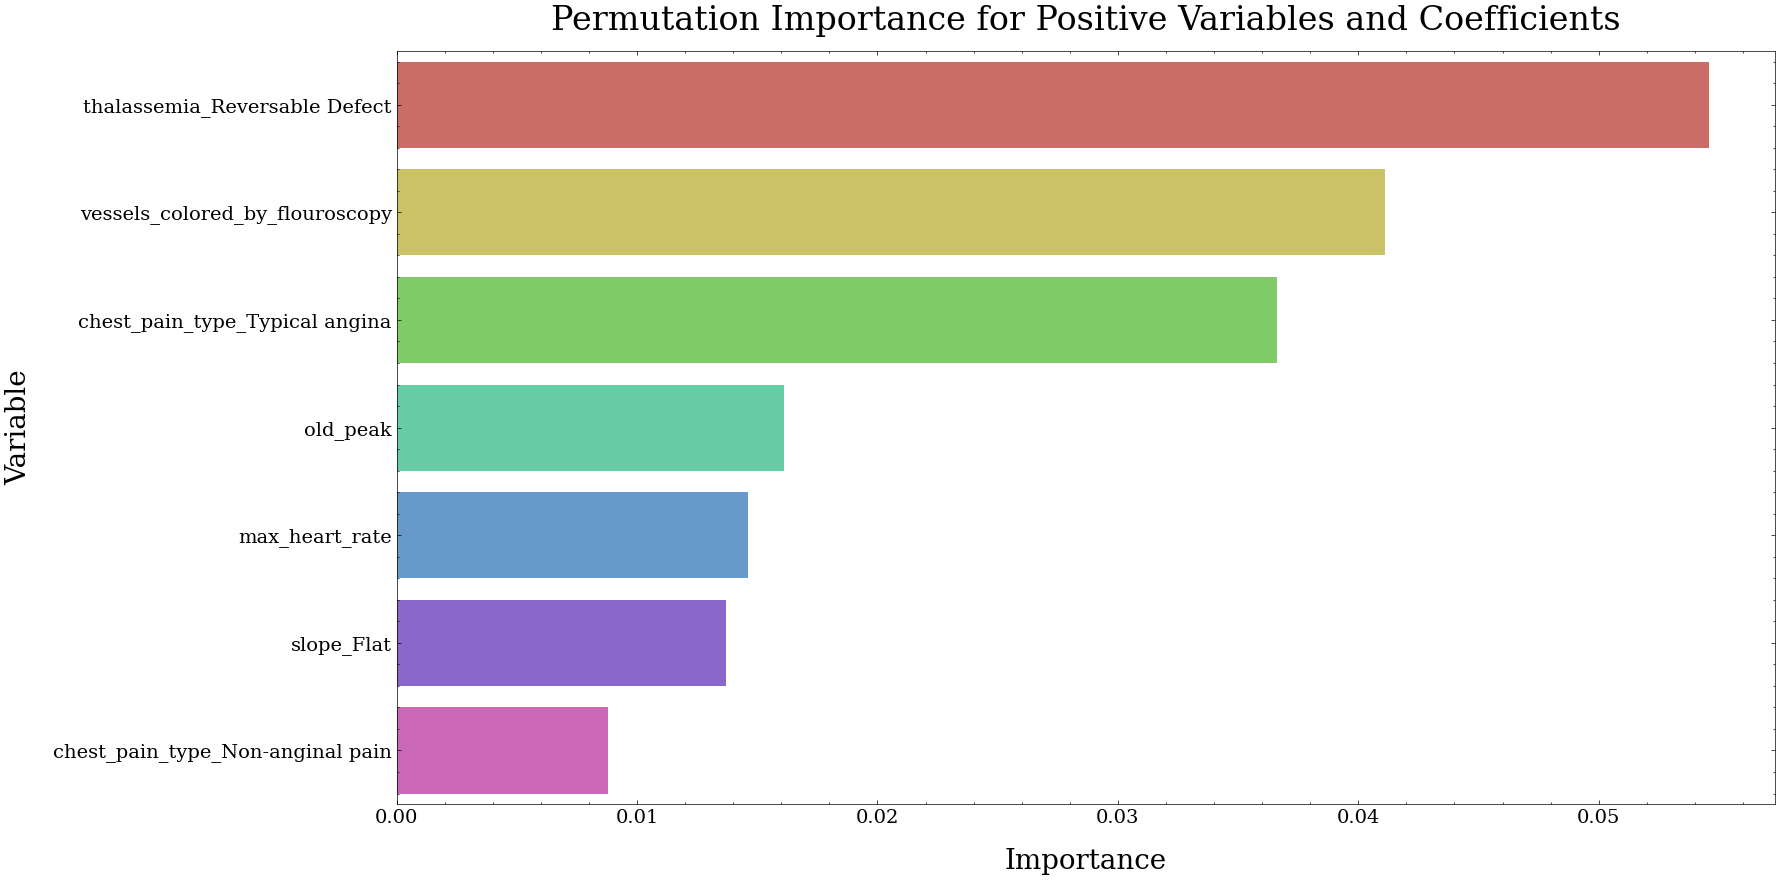

<ipython-input-21-4878ac7fac0e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



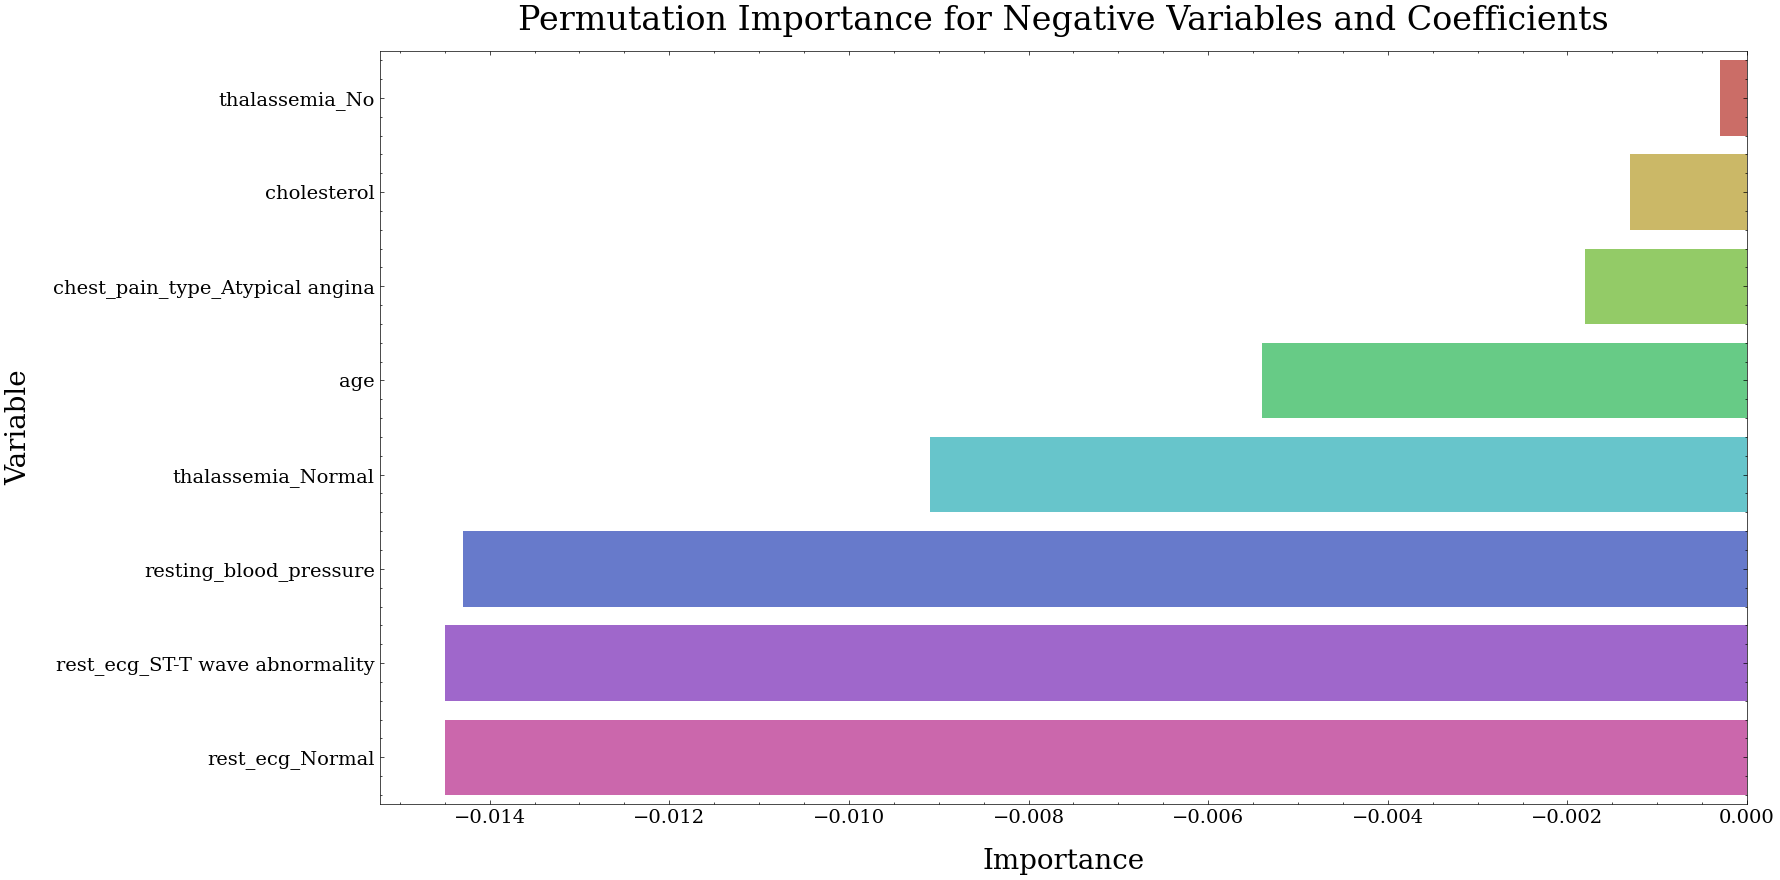

Optimal number of features: 12


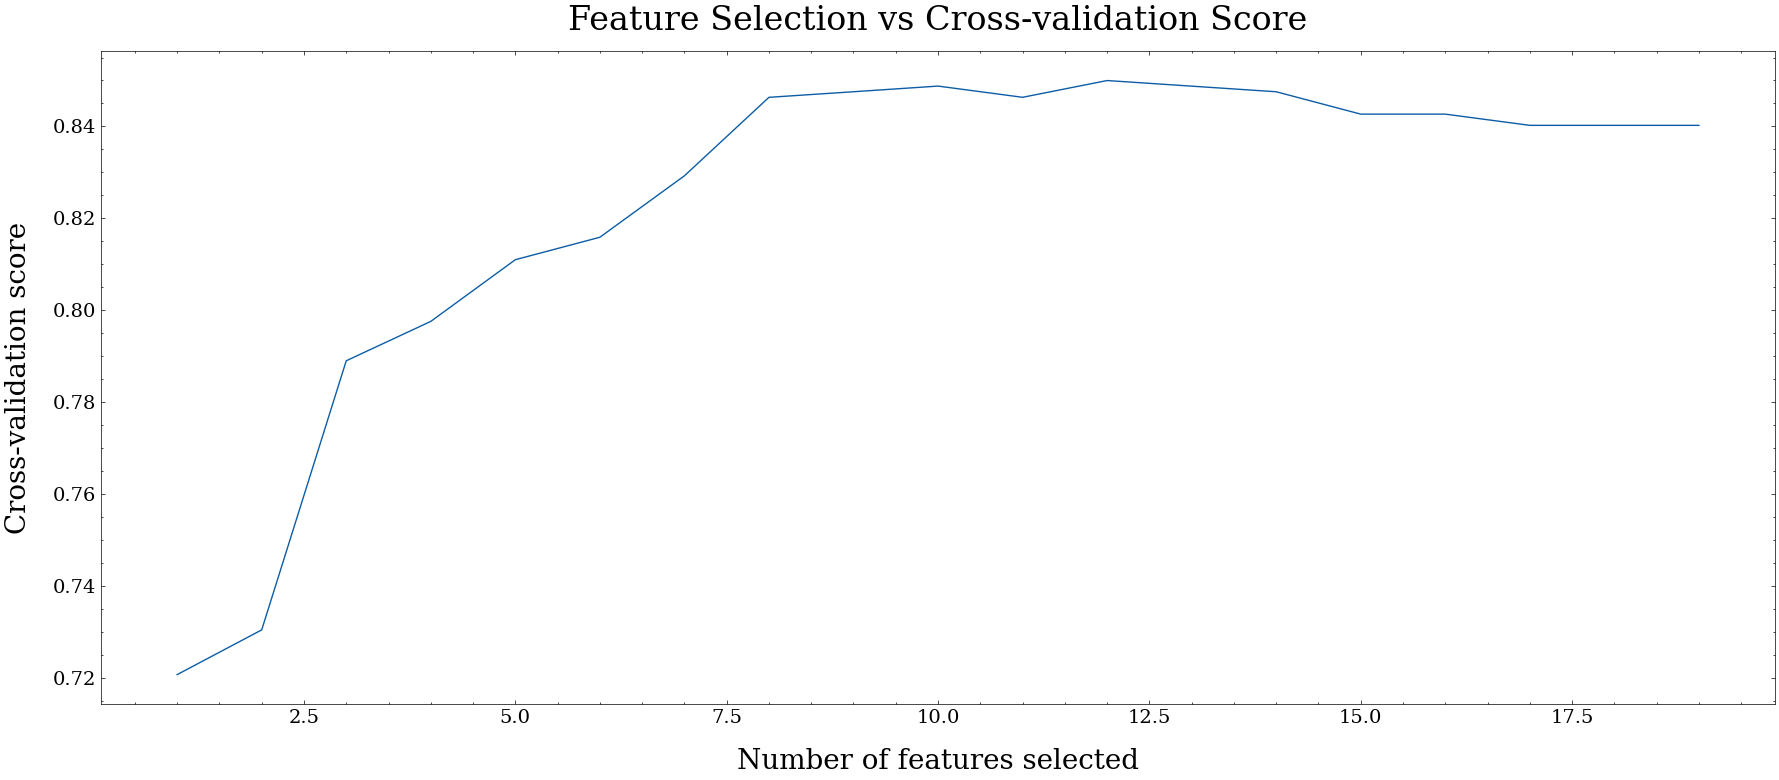

(820, 17) (205, 17) (820, 1) (205, 1)


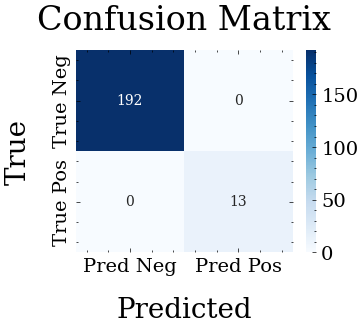

Accuracy: 1.00
criterion: gini
max_depth: 10
min_samples_split: 2


In [155]:
# Sort and display positive/negative feature importance
df_importance.sort_values(by='importance', ascending=False, inplace=True)
positive_importance = df_importance[df_importance.importance > 0]
negative_importance = df_importance[df_importance.importance < 0]

# Display permutation importance
if not positive_importance.empty:
    display_permutation_importance(positive_importance, name="Positive Variables and Coefficients")
if not negative_importance.empty:
    display_permutation_importance(negative_importance, name="Negative Variables and Coefficients")

# 4. Recursive Feature Elimination (RFECV)
rfecv = RFECV(estimator=model_lr_sk, step=1, cv=3, min_features_to_select=1)
rfecv.fit(X_train_lr_sk, y_train_lr_sk)

print(f"Optimal number of features: {rfecv.n_features_}")
scores = rfecv.cv_results_['mean_test_score']

# Plot RFECV results
fig, ax = plt.subplots(figsize=(18, 8))
plt.plot(range(1, len(scores) + 1), scores)
ax.set_xlabel('Number of features selected')
ax.set_ylabel('Cross-validation score')
ax.set_title('Feature Selection vs Cross-validation Score')

plt.tight_layout()
plt.show()

# 5. Decision Tree Classifier - Training and Evaluation
df_heart_tree = df_heart.copy()  # Assuming df_heart_tree is preloaded
df_target = df_heart_tree[['thalassemia_Normal']]  # Using 'thalassemia_Normal' as the target

# Encode categorical features
encoder = OrdinalEncoder()
df_target = encoder.fit_transform(df_target.values)
df_target = df_heart_tree[['thalassemia_Normal']] = df_target

# Split data into predictors and target
X = df_heart_tree.drop(['thalassemia_No', 'thalassemia_Normal', 'thalassemia_Reversable Defect'], axis=1)
y = df_target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Scale numerical features
scaler = StandardScaler()
X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])

# Train a Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier_res = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Display confusion matrix and accuracy score
display_confusion_matrix(y_test, y_pred)
display_score(y_test, y_pred, average='micro')

# GridSearchCV for Decision Tree Hyperparameter Tuning
param_grid = {
    'max_depth': [i for i in range(1, 25)],
    'min_samples_split': [i for i in range(2, 25)],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

# Best parameters and scoring results
for k, v in grid.best_params_.items():
    print(f"{k}: {v}")